In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from yellowbrick.cluster.silhouette import silhouette_visualizer
import plotly.express as px
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv("../input/senae_importacion_general_enero_junio_2013 (1).csv")
df

TIPO_IMPORTACION    ESTADO_DECLARACION FEC_INGRESO  \
0             IMP.GRAL.  10-SALIDA AUTORIZADA  2013-03-26   
1             IMP.GRAL.  10-SALIDA AUTORIZADA  2013-05-13   
2             IMP.GRAL.  10-SALIDA AUTORIZADA  2013-06-17   
3             IMP.GRAL.  10-SALIDA AUTORIZADA  2013-01-15   
4             IMP.GRAL.  10-SALIDA AUTORIZADA  2013-02-26   
...                 ...                   ...         ...   
612167        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-04-16   
612168        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-04-09   
612169        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-06-28   
612170        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-01-22   
612171        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-03-27   

                     DISTRITO                   REGIMEN  SUBPARTIDA  \
0       019-GUAYAQUIL - AEREO  10-IMPORTACION A CONSUMO  7604292000   
1       019-GUAYAQUIL - AEREO  10-IMPORTACION A CONSUMO  3917400000   
2       019-GUAYAQUIL - AEREO  10-IMPORTACION A CONSUMO  5801360000   
3       019-GUAYAQUIL - AEREO  10-IMPORTACION A CONSUMO  8531200000   
4       019-GUAYAQUIL - AEREO  10-IMPORTACION A CONSUMO  8414100000   
...                       ...                       ...         ...   
612167          127-LATACUNGA  10-IMPORTACION A CONSUMO  8517629000   
612168             073-TULCAN  10-IMPORTACION A CONSUMO  5407610000   
612169             073-TULCAN  10-IMPORTACION A CONSUMO  7413000000   
612170             091-CUENCA  10-IMPORTACION A CONSUMO  9029901000   
612171             091-CUENCA  10-IMPORTACION A CONSUMO  8536501900   

        CODIGO_COMPLEMENTARIO  CODIGO_SUPLEMENTARIO  \
0                           0                     0   
1                           0                     0   
2                           0                     0   
3                           0                     0   
4                           0                     0   
...                       ...                   ...   
612167                      0                     0   
612168                      0                     0   
612169                      0                     0   
612170                      0                     0   
612171                      0                     0   

                                  DESCRIPCION_ARANCELARIA  \
0                                      LOS DEMAS PERFILES   
1                                              ACCESORIOS   
2                                     TEJIDOS DE CHENILLA   
3       TABLEROS INDICADORES CON DISPOSITIVOS DE CRIST...   
4                                         BOMBAS DE VACIO   
...                                                   ...   
612167                                          LOS DEMÁS   
612168  CON UN CONTENIDO DE FILAMENTOS DE POLIESTER SI...   
612169  CABLES, TRENZAS Y ARTICULOS SIMILARES, DE COBR...   
612170                                    DE VELOCIMETROS   
612171                                          LOS DEMAS   

                           PAIS_ORIGEN  ... CANTIDAD_FISICA  \
0                            BR-BRASIL  ...          113.41   
1       GB-REINO UNIDO DE GRAN BRETAÑA  ...          440.00   
2                           BE-BELGICA  ...            6.00   
3                             CN-CHINA  ...            2.00   
4                          DE-ALEMANIA  ...            2.00   
...                                ...  ...             ...   
612167                        CN-CHINA  ...          242.00   
612168                     CO-COLOMBIA  ...          246.50   
612169                     CO-COLOMBIA  ...          807.97   
612170                        CN-CHINA  ...          100.00   
612171                        JP-JAPON  ...            2.00   

       CANTIDAD_COMERCIAL SALVAGUARDIA SALVAGUARDIA_ESPECIFICA FODINFA  \
0                    75.0          0.0                     0.0   13.89   
1                   440.0          0.0                     0.0    1.92   
2                     6.0          0.0          

In [4]:
gdf=gpd.read_file("../input/ecuador.geojson")
gdf

DPA_VALOR DPA_ANIO DPA_CANTON       DPA_DESCAN DPA_PROVIN  \
0            0     2011       0101           CUENCA         01   
1            0     2011       0102            GIRON         01   
2            0     2011       0103         GUALACEO         01   
3            0     2011       0104            NABON         01   
4            0     2011       0105            PAUTE         01   
..         ...      ...        ...              ...        ...   
219          0     2011       2402      LA LIBERTAD         24   
220          0     2011       2403          SALINAS         24   
221          0     2011       9001  LAS GOLONDRINAS         90   
222          0     2011       9003   MANGA DEL CURA         90   
223          0     2011       9004      EL PIEDRERO         90   

             DPA_DESPRO  PCODE2  \
0                 AZUAY  EC0101   
1                 AZUAY  EC0102   
2                 AZUAY  EC0103   
3                 AZUAY  EC0104   
4                 AZUAY  EC0105   
..                  ...     ...   
219         SANTA ELENA  EC2402   
220         SANTA ELENA  EC2403   
221  ZONA NO DELIMITADA  EC9001   
222  ZONA NO DELIMITADA  EC9003   
223  ZONA NO DELIMITADA  EC9004   

                                              geometry  
0    MULTIPOLYGON (((-79.39303 -2.49798, -79.39052 ...  
1    MULTIPOLYGON (((-79.02892 -3.17588, -79.02701 ...  
2    MULTIPOLYGON (((-78.63193 -2.93822, -78.63687 ...  
3    MULTIPOLYGON (((-78.93581 -3.28822, -78.93412 ...  
4    MULTIPOLYGON (((-78.64190 -2.72233, -78.64778 ...  
..                                                 ...  
219  MULTIPOLYGON (((-80.87062 -2.27018, -80.87315 ...  
220  MULTIPOLYGON (((-80.92200 -2.21943, -80.92059 ...  
221  MULTIPOLYGON (((-78.92286 0.35833, -78.92784 0...  
222  MULTIPOLYGON (((-79.45992 -0.50373, -79.45941 ...  
223  MULTIPOLYGON (((-79.20889 -2.31277, -79.20559 ...  

[224 rows x 8 columns]

# LIMPIEZA DF

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.columns

Index(['TIPO_IMPORTACION', 'ESTADO_DECLARACION', 'FEC_INGRESO', 'DISTRITO',
       'REGIMEN', 'SUBPARTIDA', 'CODIGO_COMPLEMENTARIO',
       'CODIGO_SUPLEMENTARIO', 'DESCRIPCION_ARANCELARIA', 'PAIS_ORIGEN',
       'CODIGO_LIBERACION', 'TRATAMIENTO_PREFERENCIAL',
       'CONVENIO_INTERNACIONAL', 'TIPO_UNIDAD_FISICA', 'TIPO_UNIDAD_COMERCIAL',
       'PESO_NETO', 'FOB', 'FLETE', 'SEGURO', 'CIF', 'CANTIDAD_FISICA',
       'CANTIDAD_COMERCIAL', 'SALVAGUARDIA', 'SALVAGUARDIA_ESPECIFICA',
       'FODINFA', 'ICE_ADVALOREM', 'ICE_ESPECIFICO', 'IVA', 'ADVALOREM',
       'ADVALOREM_ESPECIFICO'],
      dtype='object')

In [7]:
df = df.drop_duplicates(df)

In [8]:
df.drop(columns=['CODIGO_COMPLEMENTARIO','CODIGO_SUPLEMENTARIO','SUBPARTIDA'],inplace=True)

In [9]:
df["CONVENIO_INTERNACIONAL"].unique()

array(['NO APLICA',
       '0028-ACDO. COMP. ECO.CAN MERCOSUR-BRASIL # 59 DEC. EJ. # 2675-A R.O. # 555 DEL 31 DE MARZO DEL 2005',
       '0109-CAN-COL.ACDO.MICIP-MINFIN #524(R.O #41 OCT-6-92), #33 R.O #123FEB-5-93',
       '0064-CAN-PER DEC. EJ. # 692 Y 1329 R. O. # 166 Y 296 DE OCT-03-97, OCT-12-99',
       '0037-ACDO. COMP. ECO.-ALADI-CHI. #32 DEC. EJ. # 2439 SUP. R.O # 603 ENE-03-95',
       '0019-ACDO. COMP. ECO.CAN MERCOSUR-ARGENTINA # 59 DEC. EJ. # 2675-A R.O. # 555 DEL 31 DE MARZO DEL 2005',
       '0060-ACO. COMP. ECO.-ALADI-CUBA # 46 DEC. EJ. # 2357 R. O. # 524 FEB-28-2002',
       '0172-PAR:ARG-BRA-MEX D.E.474 MICIP-FINAN 409,RO.141,S755,MAR-3-89,AGO-26-91',
       '0073-ACDO. COMP. ECON.-ALADI-MEX. # 29 ENTRE (DIC. 2 DE 1994)',
       '0055-ACDO. COMP. ECO.CAN MERCOSUR-URUGUAY # 59 DEC. EJ. # 2675-A R.O. # 555 DEL 31 DE MARZO DEL 2005',
       '0127-CAN-VEN.ACDO.MICIP-MINFIN #524(R.O #41 OCT-6-92) #33 R.O #123 FEB-5-93',
       '0091-CAN-BOL.ACDO.MICIP-MINFIN #524(R.O #41 OC

In [10]:
def extract_date(text):
    # Busca fechas en formato de texto, ej: '31 DE MARZO DEL 2005' o 'MAR-3-89'
    date_patterns = [
        r'\b\d{1,2} DE [A-Z]+\b DEL \d{4}',  # Ej: 31 DE MARZO DEL 2005
        r'[A-Z]+-\d{1,2}-\d{2}',              # Ej: MAR-3-89
        r'[A-Z]+-\d{1,2}-\d{4}'              # Ej: MAR-03-1994
    ]
    for pattern in date_patterns:
        match = re.search(pattern, text)
        if match:
            return match.group(0)
    return None

In [11]:
def extract_place(text):
    # Busca lugar antes de la fecha
    date = extract_date(text)
    if date:
        place_text = text.split(date)[0]
        return place_text.strip().rstrip('#').rstrip()
    return text

In [12]:
# Aplicar funciones al DataFrame
df['LUGAR'] = df['CONVENIO_INTERNACIONAL'].apply(extract_place)
df['FECHA'] = df['CONVENIO_INTERNACIONAL'].apply(extract_date)

In [13]:
df["DESCRIPCION_ARANCELARIA"]

0                                        LOS DEMAS PERFILES
1                                                ACCESORIOS
2                                       TEJIDOS DE CHENILLA
3         TABLEROS INDICADORES CON DISPOSITIVOS DE CRIST...
4                                           BOMBAS DE VACIO
                                ...                        
612167                                            LOS DEMÁS
612168    CON UN CONTENIDO DE FILAMENTOS DE POLIESTER SI...
612169    CABLES, TRENZAS Y ARTICULOS SIMILARES, DE COBR...
612170                                      DE VELOCIMETROS
612171                                            LOS DEMAS
Name: DESCRIPCION_ARANCELARIA, Length: 612172, dtype: object

In [14]:
df["DESCRIPCION_ARANCELARIA"]=df["DESCRIPCION_ARANCELARIA"].replace("LOS DEMÁS","LOS DEMAS")
df["DESCRIPCION_ARANCELARIA"]=df["DESCRIPCION_ARANCELARIA"].replace("LAS DEMÁS","LOS DEMAS")

In [15]:
df

TIPO_IMPORTACION    ESTADO_DECLARACION FEC_INGRESO  \
0             IMP.GRAL.  10-SALIDA AUTORIZADA  2013-03-26   
1             IMP.GRAL.  10-SALIDA AUTORIZADA  2013-05-13   
2             IMP.GRAL.  10-SALIDA AUTORIZADA  2013-06-17   
3             IMP.GRAL.  10-SALIDA AUTORIZADA  2013-01-15   
4             IMP.GRAL.  10-SALIDA AUTORIZADA  2013-02-26   
...                 ...                   ...         ...   
612167        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-04-16   
612168        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-04-09   
612169        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-06-28   
612170        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-01-22   
612171        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-03-27   

                     DISTRITO                   REGIMEN  \
0       019-GUAYAQUIL - AEREO  10-IMPORTACION A CONSUMO   
1       019-GUAYAQUIL - AEREO  10-IMPORTACION A CONSUMO   
2       019-GUAYAQUIL - AEREO  10-IMPORTACION A CONSUMO   
3       019-GUAYAQUIL - AEREO  10-IMPORTACION A CONSUMO   
4       019-GUAYAQUIL - AEREO  10-IMPORTACION A CONSUMO   
...                       ...                       ...   
612167          127-LATACUNGA  10-IMPORTACION A CONSUMO   
612168             073-TULCAN  10-IMPORTACION A CONSUMO   
612169             073-TULCAN  10-IMPORTACION A CONSUMO   
612170             091-CUENCA  10-IMPORTACION A CONSUMO   
612171             091-CUENCA  10-IMPORTACION A CONSUMO   

                                  DESCRIPCION_ARANCELARIA  \
0                                      LOS DEMAS PERFILES   
1                                              ACCESORIOS   
2                                     TEJIDOS DE CHENILLA   
3       TABLEROS INDICADORES CON DISPOSITIVOS DE CRIST...   
4                                         BOMBAS DE VACIO   
...                                                   ...   
612167                                          LOS DEMAS   
612168  CON UN CONTENIDO DE FILAMENTOS DE POLIESTER SI...   
612169  CABLES, TRENZAS Y ARTICULOS SIMILARES, DE COBR...   
612170                                    DE VELOCIMETROS   
612171                                          LOS DEMAS   

                           PAIS_ORIGEN CODIGO_LIBERACION  \
0                            BR-BRASIL         NO APLICA   
1       GB-REINO UNIDO DE GRAN BRETAÑA         NO APLICA   
2                           BE-BELGICA         NO APLICA   
3                             CN-CHINA         NO APLICA   
4                          DE-ALEMANIA         NO APLICA   
...                                ...               ...   
612167                        CN-CHINA         NO APLICA   
612168                     CO-COLOMBIA         NO APLICA   
612169                     CO-COLOMBIA         NO APLICA   
612170                        CN-CHINA         NO APLICA   
612171                        JP-JAPON         NO APLICA   

       TRATAMIENTO_PREFERENCIAL  \
0                     NO APLICA   
1                     NO APLICA   
2                     NO APLICA   
3                     NO APLICA   
4                     NO APLICA   
...                         ...   
612167                NO APLICA   
612168                NO APLICA   
612169                NO APLICA   
612170                NO APLICA   
612171                NO APLICA   

                                   CONVENIO_INTERNACIONAL  ... SALVAGUARDIA  \
0                                               NO APLICA  ...          0.0   
1                                               NO APLICA  ...          0.0   
2                                               NO APLICA  ...          0.0   
3                                               NO APLICA  ...          0.0   
4                                               NO APLICA  ...          0.0   
...                                                   ...  ...          ...   
612167                                          NO APLICA  ...          0.0   
612168                                          NO APLICA 

In [16]:
df.iloc[100]

TIPO_IMPORTACION                           IMP.GRAL.
ESTADO_DECLARACION              10-SALIDA AUTORIZADA
FEC_INGRESO                               2013-03-13
DISTRITO                    028-GUAYAQUIL - MARITIMO
REGIMEN                     10-IMPORTACION A CONSUMO
DESCRIPCION_ARANCELARIA                    LOS DEMAS
PAIS_ORIGEN                                TW-TAIWAN
CODIGO_LIBERACION                          NO APLICA
TRATAMIENTO_PREFERENCIAL                   NO APLICA
CONVENIO_INTERNACIONAL                     NO APLICA
TIPO_UNIDAD_FISICA                31-KILOGRAMO BRUTO
TIPO_UNIDAD_COMERCIAL                       U-UNIDAD
PESO_NETO                                      0.213
FOB                                              3.0
FLETE                                          0.092
SEGURO                                          0.03
CIF                                            3.122
CANTIDAD_FISICA                                0.213
CANTIDAD_COMERCIAL                            

In [17]:
df=df.loc[df.ICE_ESPECIFICO!=0.00,:]

In [18]:
# Cuenta los valores cero por columna
ceros_por_columna = df.eq(0).sum().astype(int)

# Muestra las columnas ordenadas por la cantidad de ceros
ceros_por_columna = ceros_por_columna.sort_values(ascending=False)

# Muestra las columnas con sus respectivos conteos de ceros
print("Columnas con más valores cero:")
print(ceros_por_columna)

Columnas con más valores cero:
SALVAGUARDIA_ESPECIFICA     515
SALVAGUARDIA                515
ADVALOREM_ESPECIFICO        289
ADVALOREM                   253
ICE_ADVALOREM               219
FLETE                       140
SEGURO                       45
LUGAR                         0
IVA                           0
ICE_ESPECIFICO                0
FODINFA                       0
CANTIDAD_COMERCIAL            0
CANTIDAD_FISICA               0
CIF                           0
TIPO_IMPORTACION              0
ESTADO_DECLARACION            0
FOB                           0
PESO_NETO                     0
TIPO_UNIDAD_COMERCIAL         0
TIPO_UNIDAD_FISICA            0
CONVENIO_INTERNACIONAL        0
TRATAMIENTO_PREFERENCIAL      0
CODIGO_LIBERACION             0
PAIS_ORIGEN                   0
DESCRIPCION_ARANCELARIA       0
REGIMEN                       0
DISTRITO                      0
FEC_INGRESO                   0
FECHA                         0
dtype: int32


In [19]:
umbral_ceros = 549774  # por ejemplo, considerar eliminar columnas con más de 1000 ceros
columnas_a_eliminar = ceros_por_columna[ceros_por_columna > umbral_ceros].index.tolist()

# Elimina las columnas seleccionadas del DataFrame original si es necesario
if len(columnas_a_eliminar) > 0:
    df = df.drop(columns=columnas_a_eliminar)
    print(f"Se eliminaron las siguientes columnas: {columnas_a_eliminar}")
else:
    print("No se eliminaron columnas.")

# Muestra la información actualizada del DataFrame
print(df.head())

No se eliminaron columnas.
     TIPO_IMPORTACION    ESTADO_DECLARACION FEC_INGRESO  \
884         IMP.GRAL.  10-SALIDA AUTORIZADA  2013-02-05   
1650        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-06-25   
2205        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-03-07   
3585        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-05-14   
3830        IMP.GRAL.  10-SALIDA AUTORIZADA  2013-01-28   

                      DISTRITO                                 REGIMEN  \
884   028-GUAYAQUIL - MARITIMO                        73-ALMACEN LIBRE   
1650  028-GUAYAQUIL - MARITIMO  70-DEPOSITO ADUANERO PUBLICO Y PRIVADO   
2205                 055-QUITO                10-IMPORTACION A CONSUMO   
3585  028-GUAYAQUIL - MARITIMO                        73-ALMACEN LIBRE   
3830  028-GUAYAQUIL - MARITIMO                10-IMPORTACION A CONSUMO   

     DESCRIPCION_ARANCELARIA                     PAIS_ORIGEN  \
884                LOS DEMAS  GB-REINO UNIDO DE GRAN BRETAÑA   
1650               LOS DEMAS                 

In [20]:
df=df.loc[(df.TRATAMIENTO_PREFERENCIAL=="NO APLICA") ,:]

In [21]:
df = df.drop(columns=["TRATAMIENTO_PREFERENCIAL"])

In [22]:
df=df.loc[(df.CONVENIO_INTERNACIONAL=="NO APLICA") ,:]
df=df.loc[(df.CODIGO_LIBERACION=="NO APLICA") ,:]
df = df.drop(columns=["CODIGO_LIBERACION"])
df=df.loc[df.ESTADO_DECLARACION=="10-SALIDA AUTORIZADA"]
df = df.drop(columns=["ESTADO_DECLARACION"])

In [23]:
df['REGIMEN'].unique()

array(['73-ALMACEN LIBRE', '10-IMPORTACION A CONSUMO',
       '70-DEPOSITO ADUANERO PUBLICO Y PRIVADO', '75-ALMACEN ESPECIAL'],
      dtype=object)

In [24]:
df['TIPO_IMPORTACION'].unique()
df = df.drop(columns=["TIPO_IMPORTACION"])

In [25]:
df.columns

Index(['FEC_INGRESO', 'DISTRITO', 'REGIMEN', 'DESCRIPCION_ARANCELARIA',
       'PAIS_ORIGEN', 'CONVENIO_INTERNACIONAL', 'TIPO_UNIDAD_FISICA',
       'TIPO_UNIDAD_COMERCIAL', 'PESO_NETO', 'FOB', 'FLETE', 'SEGURO', 'CIF',
       'CANTIDAD_FISICA', 'CANTIDAD_COMERCIAL', 'SALVAGUARDIA',
       'SALVAGUARDIA_ESPECIFICA', 'FODINFA', 'ICE_ADVALOREM', 'ICE_ESPECIFICO',
       'IVA', 'ADVALOREM', 'ADVALOREM_ESPECIFICO', 'LUGAR', 'FECHA'],
      dtype='object')

In [26]:
# Filtrar valores atípicos utilizando el IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in ['PESO_NETO', 'CIF', 'FLETE', 'SEGURO']:
    df = remove_outliers_iqr(df, column)

In [27]:
df

FEC_INGRESO                  DISTRITO  \
884     2013-02-05  028-GUAYAQUIL - MARITIMO   
2205    2013-03-07                 055-QUITO   
3585    2013-05-14  028-GUAYAQUIL - MARITIMO   
4635    2013-05-10  028-GUAYAQUIL - MARITIMO   
7667    2013-03-12  028-GUAYAQUIL - MARITIMO   
...            ...                       ...   
599982  2013-03-26  028-GUAYAQUIL - MARITIMO   
601954  2013-04-03                 055-QUITO   
609408  2013-04-01                091-CUENCA   
610647  2013-04-02                091-CUENCA   
611072  2013-04-01                091-CUENCA   

                                       REGIMEN  \
884                           73-ALMACEN LIBRE   
2205                  10-IMPORTACION A CONSUMO   
3585                          73-ALMACEN LIBRE   
4635                  10-IMPORTACION A CONSUMO   
7667    70-DEPOSITO ADUANERO PUBLICO Y PRIVADO   
...                                        ...   
599982  70-DEPOSITO ADUANERO PUBLICO Y PRIVADO   
601954                10-IMPORTACION A CONSUMO   
609408                10-IMPORTACION A CONSUMO   
610647                10-IMPORTACION A CONSUMO   
611072                10-IMPORTACION A CONSUMO   

                                  DESCRIPCION_ARANCELARIA  \
884                                             LOS DEMAS   
2205                                            LOS DEMAS   
3585                                            LOS DEMAS   
4635                                            LOS DEMAS   
7667                                            LOS DEMAS   
...                                                   ...   
599982  TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   
601954  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
609408  TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   
610647  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
611072  TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   

                           PAIS_ORIGEN CONVENIO_INTERNACIONAL  \
884     GB-REINO UNIDO DE GRAN BRETAÑA              NO APLICA   
2205                           CU-CUBA              NO APLICA   
3585    GB-REINO UNIDO DE GRAN BRETAÑA              NO APLICA   
4635                      GT-GUATEMALA              NO APLICA   
7667                      GT-GUATEMALA              NO APLICA   
...                                ...                    ...   
599982                       ES-ESPAÑA              NO APLICA   
601954                 NL-PAISES BAJOS              NO APLICA   
609408                      FR-FRANCIA              NO APLICA   
610647                       ES-ESPAÑA              NO APLICA   
611072                      FR-FRANCIA              NO APLICA   

       TIPO_UNIDAD_FISICA TIPO_UNIDAD_COMERCIAL  PESO_NETO       FOB  ...  \
884              61-LITRO              U-UNIDAD    174.540   1401.20  ...   
2205             61-LITRO              CAJ-CAJA   2843.510  11025.00  ...   
3585             61-LITRO              U-UNIDAD   1635.097  17606.76  ...   
4635             61-LITRO              CAJ-CAJA   1101.520  15346.04  ...   
7667             61-LITRO              CAJ-CAJA   1778.190  25920.10  ...   
...                   ...                   ...        ...       ...  ...   
599982           61-LITRO              CAJ-CAJA    630.000  13164.20  ...   
601954           61-LITRO          BOT-BOTELLAS   2448.000   5324.73  ...   
609408           61-LITRO              CAJ-CAJA   2641.320  12485.20  ...   
610647           61-LITRO              CAJ-CAJA   1434.600   6245.64  ...   
611072           61-LITRO          BOT-BOTELLAS   1202.140   3689.98  ...   

        SALVAGUARDIA  SALVAGUARDIA_ESPECIFICA  FODINFA  ICE_ADVALOREM  \
884              0.0                      0.0     7.74        2109.51   
2205             0.0                      0.0    57.95       20635.41   
3585             0.0                      0.0    93.65       28370.92   
4635             0.0                      0.0    78.44       20786.27   
7667             0.0     

# PREGUNTA JOHN TOBAR: ¿Cómo varían los costos totales de importación (CIF) entre los principales distritos de Ecuador?(RESUELTO)

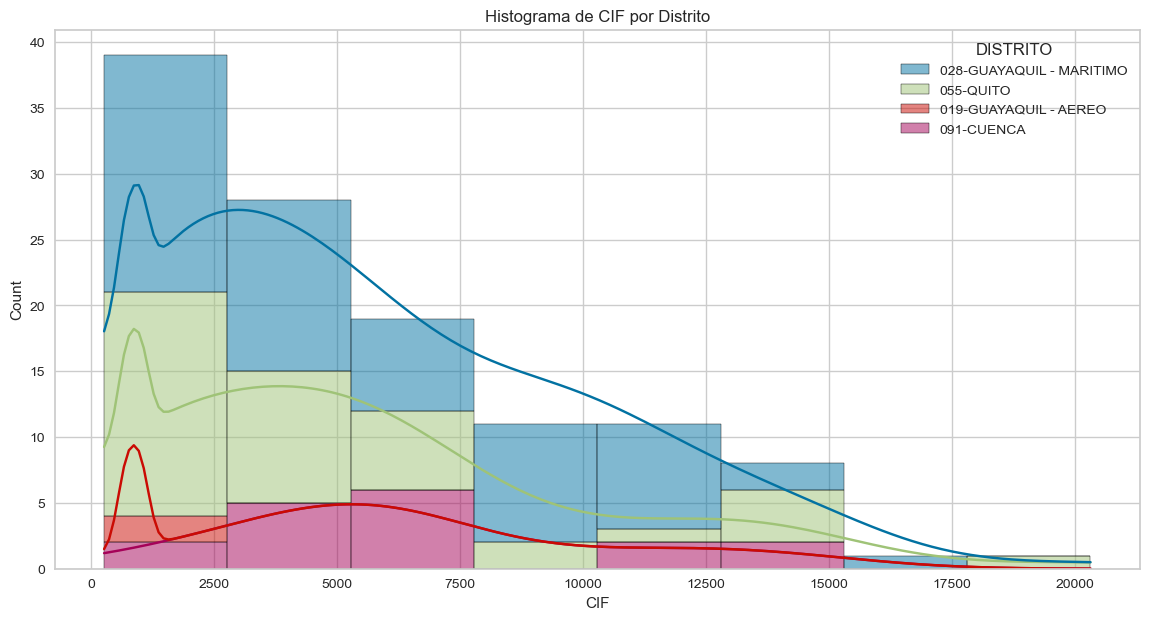

In [28]:
# Función para eliminar valores atípicos utilizando el IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Eliminar valores atípicos para cada columna relevante
for column in ['PESO_NETO', 'CIF', 'FLETE', 'SEGURO']:
    df = remove_outliers_iqr(df, column)

# Identificar los 7 principales distritos por número de registros
top_distritos = df['DISTRITO'].value_counts().head(7).index

# Filtrar el dataset para los 7 principales distritos
df_top = df[df['DISTRITO'].isin(top_distritos)]

# Histograma de CIF por distrito
plt.figure(figsize=(14, 7))
sns.histplot(data=df_top, x='CIF', hue='DISTRITO', multiple='stack', kde=True)
plt.title('Histograma de CIF por Distrito')
plt.show()

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\2595406252.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df_top[df_top['DISTRITO'] == distrito].resample('M').sum()['CIF']
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\2595406252.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df_top[df_top['DISTRITO'] == distrito].resample('M').sum()['CIF']
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\2595406252.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df_top[df_top['DISTRITO'] == distrito].resample('M').sum()['CIF']
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\2595406252.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df_top[df_top['DISTRITO'] == distrito].resample('M').sum()['CIF']


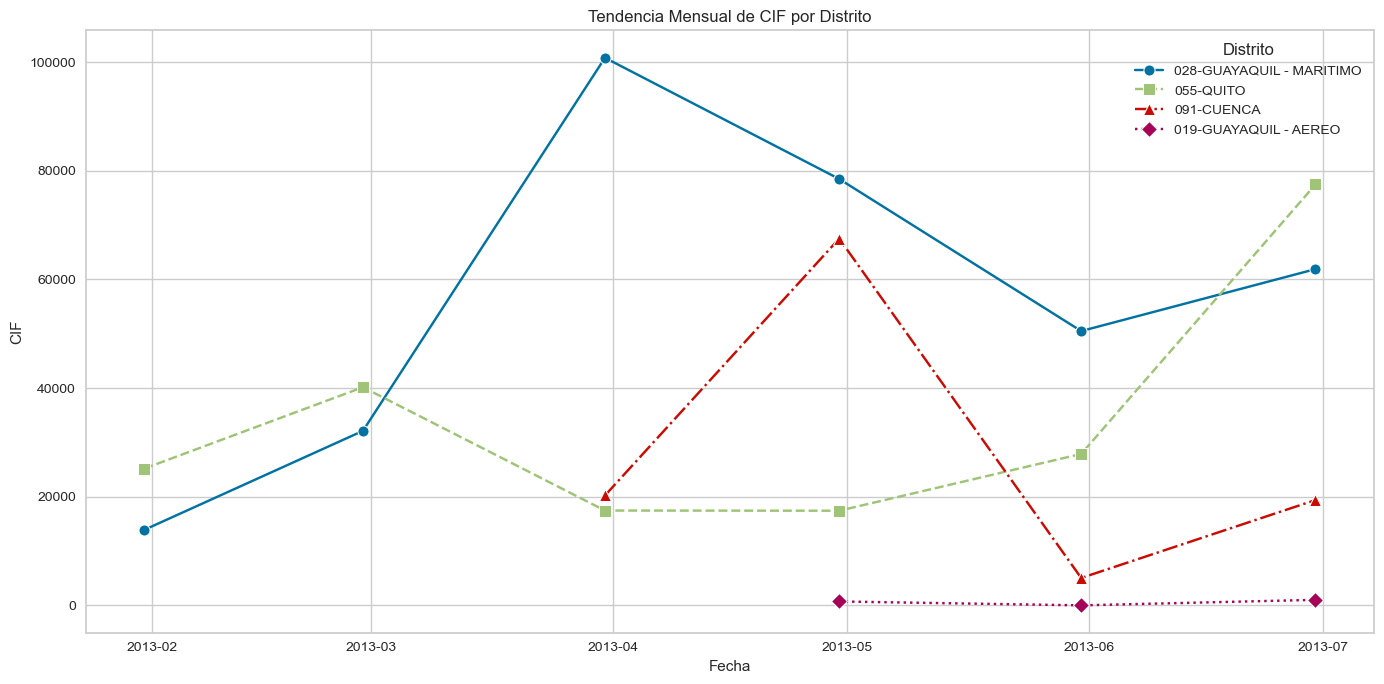

In [29]:
# Lineplot de CIF por distrito a lo largo del tiempo
df_top['FEC_INGRESO'] = pd.to_datetime(df_top['FEC_INGRESO'])
df_top.set_index('FEC_INGRESO', inplace=True)

plt.figure(figsize=(14, 7))

# Definir estilos de línea y marcadores
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
markers = ['o', 's', '^', 'D', 'v', 'P', 'X']

for i, distrito in enumerate(top_distritos):
    data = df_top[df_top['DISTRITO'] == distrito].resample('M').sum()['CIF']
    sns.lineplot(data=data, label=distrito, linestyle=line_styles[i], marker=markers[i], markersize=8)

plt.title('Tendencia Mensual de CIF por Distrito')
plt.xlabel('Fecha')
plt.ylabel('CIF')
plt.legend(title='Distrito', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Asegurarnos que FEC_INGRESO esté en formato de fecha
df['FEC_INGRESO'] = pd.to_datetime(df['FEC_INGRESO'])
# Mostrar estadísticas básicas de las columnas numéricas
print(df.describe())

# Verificar los valores únicos de DESCRIPCION_ARANCELARIA
print(df['DESCRIPCION_ARANCELARIA'].unique())

                         FEC_INGRESO    PESO_NETO           FOB       FLETE  \
count                            118   118.000000    118.000000  118.000000   
mean   2013-04-16 06:54:54.915254272   754.925814   5356.304314  175.698805   
min              2013-01-14 00:00:00     9.350000    264.120000    0.000000   
25%              2013-03-12 06:00:00   101.585000   1672.175000    0.000000   
50%              2013-04-12 12:00:00   404.350000   4339.945000   80.985000   
75%              2013-06-04 00:00:00  1056.647750   8367.057500  297.961250   
max              2013-06-27 00:00:00  5000.000000  20250.000000  837.560000   
std                              NaN   923.599389   4143.686173  211.493923   

           SEGURO           CIF  CANTIDAD_FISICA  CANTIDAD_COMERCIAL  \
count  118.000000    118.000000       118.000000          118.000000   
mean    35.670263   5567.673381       678.258559          498.237288   
min      0.000000    269.960000         1.000000            1.000000   


# PREGUNTA JOHN TOBAR: ¿Cómo varía la cantidad física de importaciones por país de origen y tipo de unidad física en Ecuador durante el primer semestre de 2013?(RESUELTO)

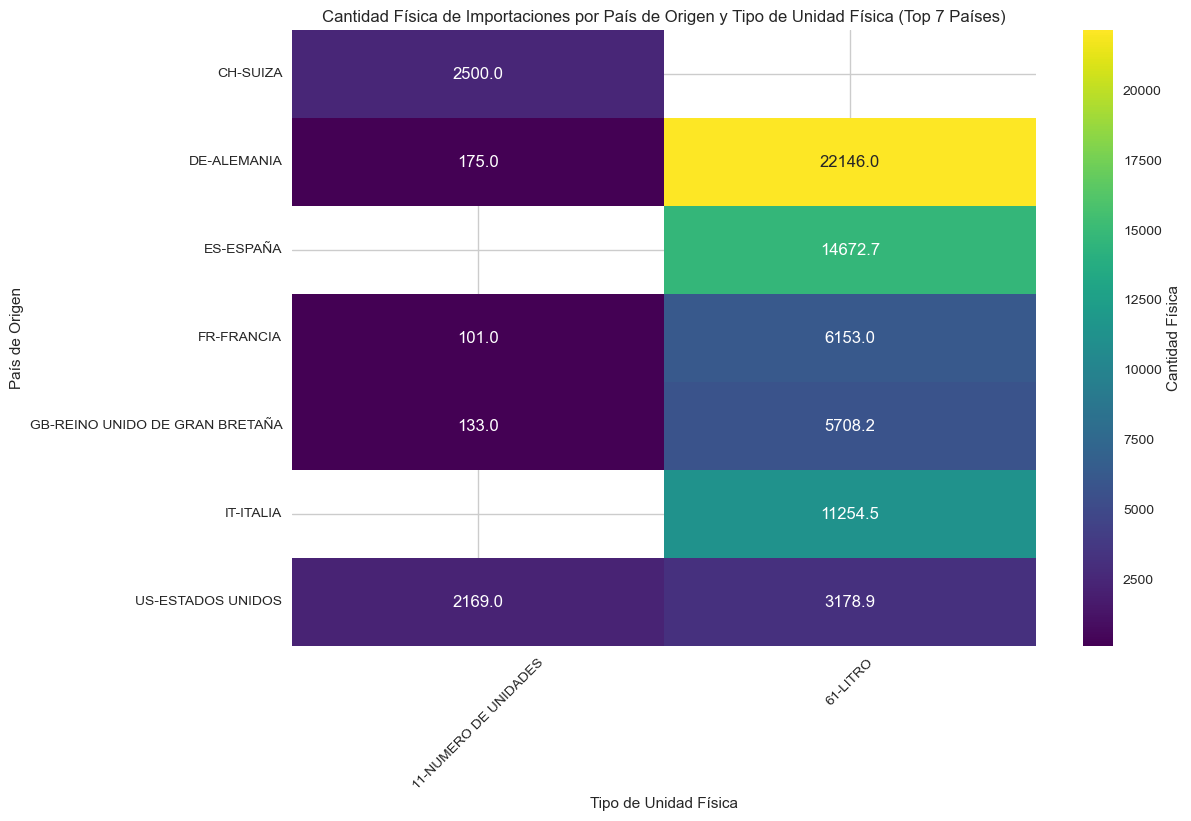

Top 7 Países por Cantidad Física de Importaciones:
PAIS_ORIGEN
DE-ALEMANIA                       22321.00
ES-ESPAÑA                         14672.70
IT-ITALIA                         11254.50
FR-FRANCIA                         6254.00
GB-REINO UNIDO DE GRAN BRETAÑA     5841.21
US-ESTADOS UNIDOS                  5347.90
CH-SUIZA                           2500.00
Name: CANTIDAD_FISICA, dtype: float64


In [31]:
# Filtrar solo las columnas relevantes
df_heatmap = df[['PAIS_ORIGEN', 'TIPO_UNIDAD_FISICA', 'CANTIDAD_FISICA']]

# Agrupar por país de origen y tipo de unidad física y sumar la cantidad física
heatmap_data = df_heatmap.groupby(['PAIS_ORIGEN', 'TIPO_UNIDAD_FISICA']).sum().reset_index()

# Obtener el top 7 de países por cantidad física
top_7_paises = heatmap_data.groupby('PAIS_ORIGEN')['CANTIDAD_FISICA'].sum().sort_values(ascending=False).head(7).index

# Filtrar heatmap_data para incluir solo los top 7 países
heatmap_data_top7 = heatmap_data[heatmap_data['PAIS_ORIGEN'].isin(top_7_paises)]

# Crear el heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data_top7.pivot_table(index='PAIS_ORIGEN', columns='TIPO_UNIDAD_FISICA', values='CANTIDAD_FISICA', aggfunc='sum'), cmap='viridis', annot=True, fmt='.1f', cbar_kws={'label': 'Cantidad Física'})
plt.title('Cantidad Física de Importaciones por País de Origen y Tipo de Unidad Física (Top 7 Países)')
plt.xlabel('Tipo de Unidad Física')
plt.ylabel('País de Origen')
plt.xticks(rotation=45)
plt.show()

# Mostrar el top 7 de países por cantidad física
print("Top 7 Países por Cantidad Física de Importaciones:")
print(heatmap_data.groupby('PAIS_ORIGEN')['CANTIDAD_FISICA'].sum().sort_values(ascending=False).head(7))

<Figure size 1200x800 with 0 Axes>

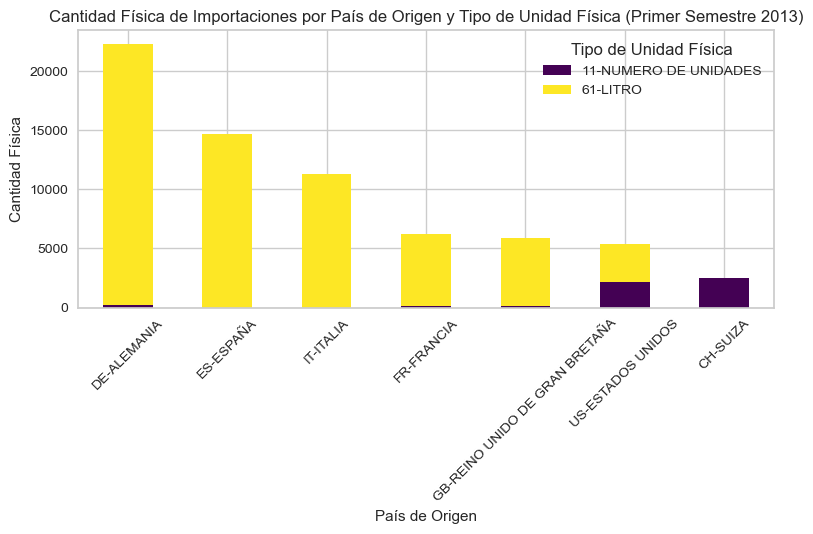

In [32]:
# Agrupar por país de origen y tipo de unidad física, sumar la cantidad física
importaciones_por_tipo_unidad = df.groupby(['PAIS_ORIGEN', 'TIPO_UNIDAD_FISICA'])['CANTIDAD_FISICA'].sum().reset_index()

# Reordenar el DataFrame para tener los países como índice y los tipos de unidad como columnas
importaciones_pivot = importaciones_por_tipo_unidad.pivot(index='PAIS_ORIGEN', columns='TIPO_UNIDAD_FISICA', values='CANTIDAD_FISICA').fillna(0)

# Obtener los top 7 países por cantidad física
top_7_paises = df.groupby('PAIS_ORIGEN')['CANTIDAD_FISICA'].sum().sort_values(ascending=False).head(7).index

# Filtrar el DataFrame para incluir solo los top 7 países
importaciones_pivot_top = importaciones_pivot.loc[top_7_paises]

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
importaciones_pivot_top.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Cantidad Física de Importaciones por País de Origen y Tipo de Unidad Física (Primer Semestre 2013)')
plt.xlabel('País de Origen')
plt.ylabel('Cantidad Física')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Unidad Física', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\1209565796.py:14: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  importaciones_pivot_top.plot(kind='bar', stacked=True, color=colores[i % len(colores)], cmap='viridis')
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\1209565796.py:14: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  importaciones_pivot_top.plot(kind='bar', stacked=True, color=colores[i % len(colores)], cmap='viridis')


<Figure size 1000x600 with 0 Axes>

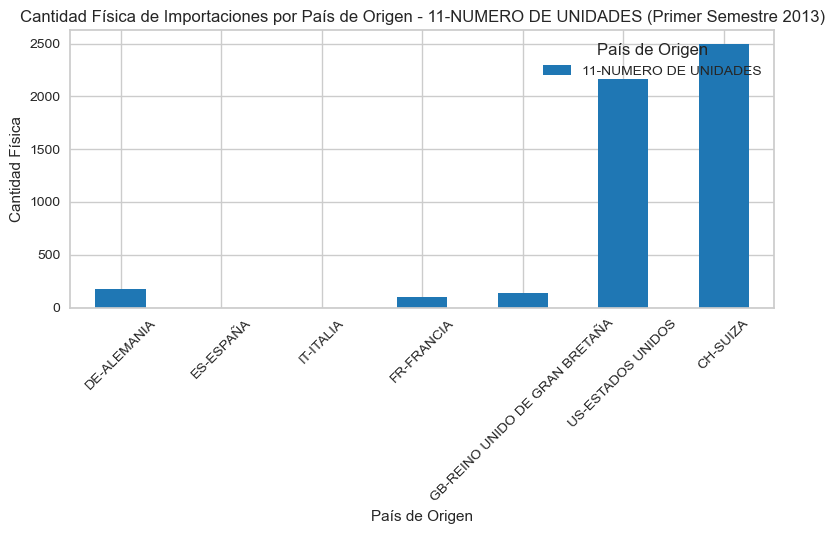

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\1209565796.py:14: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  importaciones_pivot_top.plot(kind='bar', stacked=True, color=colores[i % len(colores)], cmap='viridis')
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\1209565796.py:14: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  importaciones_pivot_top.plot(kind='bar', stacked=True, color=colores[i % len(colores)], cmap='viridis')


<Figure size 1000x600 with 0 Axes>

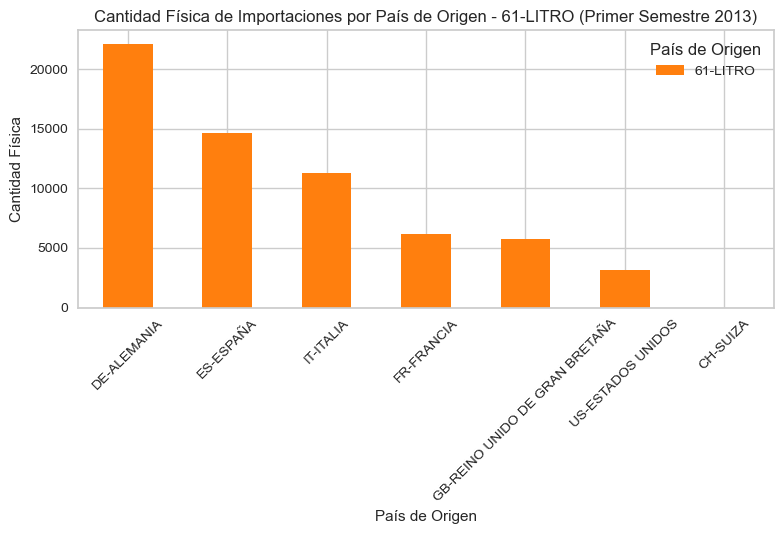

In [33]:
# Obtener los top 7 países por cantidad física
top_7_paises = df.groupby('PAIS_ORIGEN')['CANTIDAD_FISICA'].sum().sort_values(ascending=False).head(7).index

# Paleta de colores para los gráficos
colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

# Iterar sobre cada tipo de unidad física y crear gráficos individuales
for i, tipo_unidad in enumerate(importaciones_pivot.columns):
    # Filtrar el DataFrame para incluir solo los top 7 países y el tipo de unidad física actual
    importaciones_pivot_top = importaciones_pivot.loc[top_7_paises, [tipo_unidad]]

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    importaciones_pivot_top.plot(kind='bar', stacked=True, color=colores[i % len(colores)], cmap='viridis')
    plt.title(f'Cantidad Física de Importaciones por País de Origen - {tipo_unidad} (Primer Semestre 2013)')
    plt.xlabel('País de Origen')
    plt.ylabel('Cantidad Física')
    plt.xticks(rotation=45)
    plt.legend(title='País de Origen', loc='upper right')
    plt.tight_layout()
    plt.show()

# PREGUNTA SOFIA GONZALEZ: ¿Cómo varía el impuesto ad valorem (IVA y otros impuestos) en relación con el valor FOB y el país de origen? ¿Existen países que pagan más impuestos que otros en términos relativos?

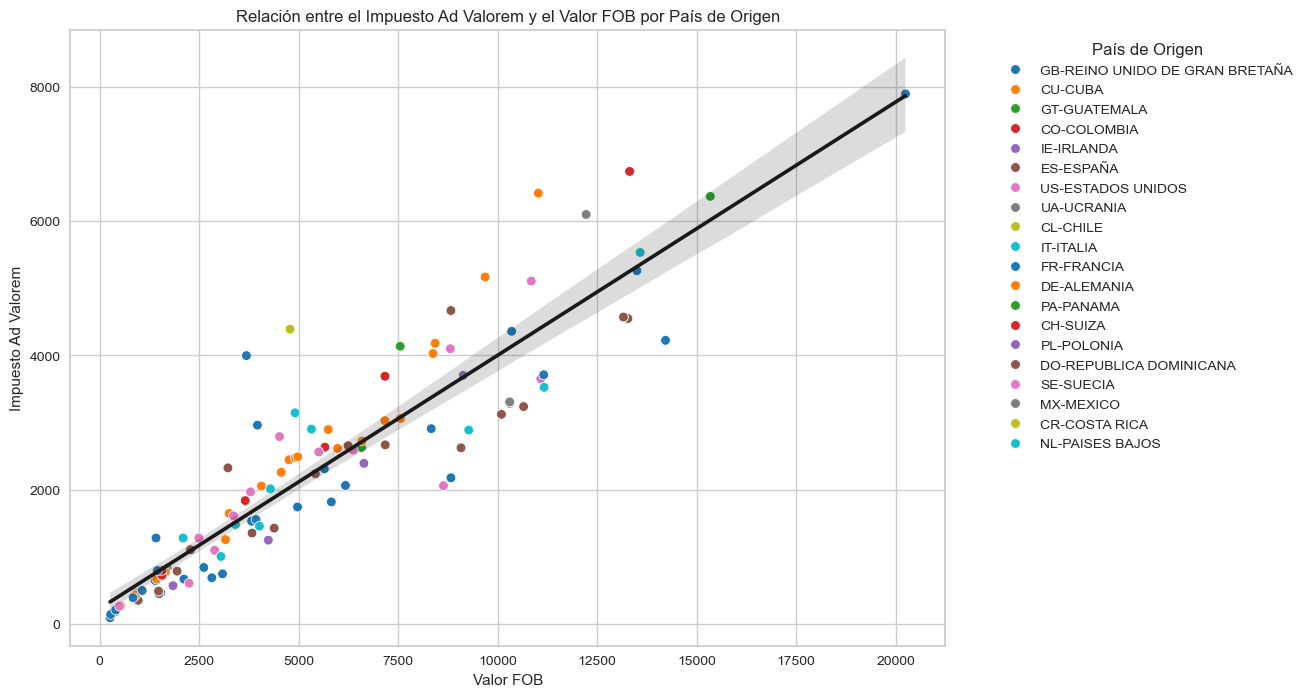

In [34]:
# Crear una columna con el impuesto ad valorem total (suma de IVA, ADVALOREM, y otros si existen)
df['IMP_ADVALOREM'] = df['IVA'] + df['ADVALOREM']
# Gráfico 1: Relación entre el impuesto ad valorem (IVA y otros impuestos) y el valor FOB por país de origen
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='FOB', y='IMP_ADVALOREM', hue='PAIS_ORIGEN', palette='tab10')
sns.regplot(data=df, x='FOB', y='IMP_ADVALOREM', scatter=False, color='.1')
plt.title('Relación entre el Impuesto Ad Valorem y el Valor FOB por País de Origen')
plt.xlabel('Valor FOB')
plt.ylabel('Impuesto Ad Valorem')
plt.legend(title='País de Origen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.75)  # Ajustar el margen derecho
plt.show()

In [35]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")
df2=df[['PAIS_ORIGEN','FOB','IMP_ADVALOREM']]
df2.loc[:, "IMP_RELATIVO"] = df2["IMP_ADVALOREM"] / df2["FOB"]

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\2094996671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, "IMP_RELATIVO"] = df2["IMP_ADVALOREM"] / df2["FOB"]


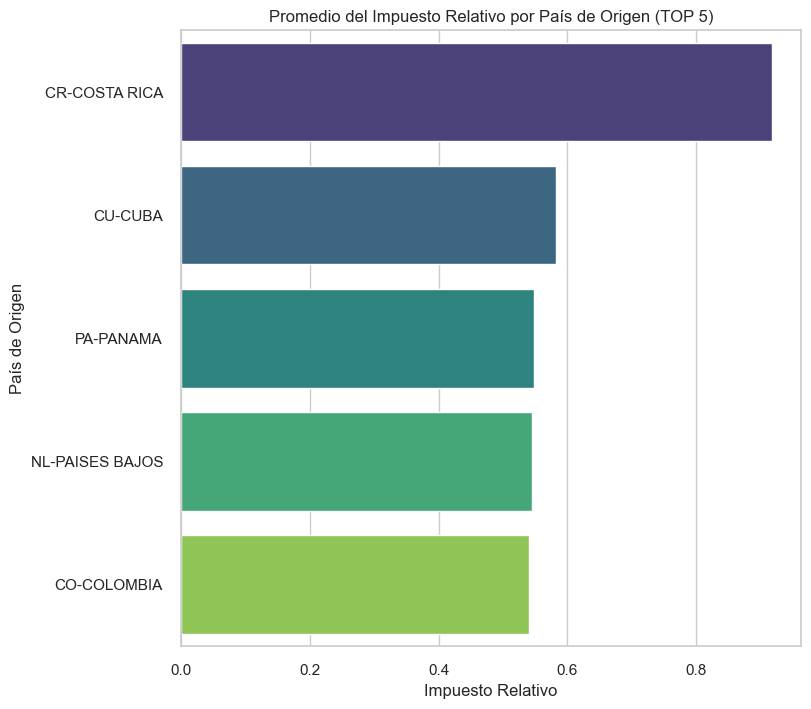

In [36]:
# Gráfico 2: Análisis de países que pagan más impuestos en términos relativos
df['IMP_RELATIVO'] = df['IMP_ADVALOREM'] / df['FOB']
impuesto_relativo_pais = df.groupby('PAIS_ORIGEN')['IMP_RELATIVO'].mean().reset_index()
impuesto_relativo_pais = impuesto_relativo_pais.sort_values(by='IMP_RELATIVO', ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(data=impuesto_relativo_pais.head(5), x='IMP_RELATIVO', y='PAIS_ORIGEN', hue='PAIS_ORIGEN', palette='viridis')
plt.title('Promedio del Impuesto Relativo por País de Origen (TOP 5)')
plt.xlabel('Impuesto Relativo')
plt.ylabel('País de Origen')
plt.show()

# PREGUNTA SOFIA GONZALEZ: ¿Qué productos tienen el mayor valor CIF? ¿Existe alguna relación entre la descripción arancelaria y el costo CIF?

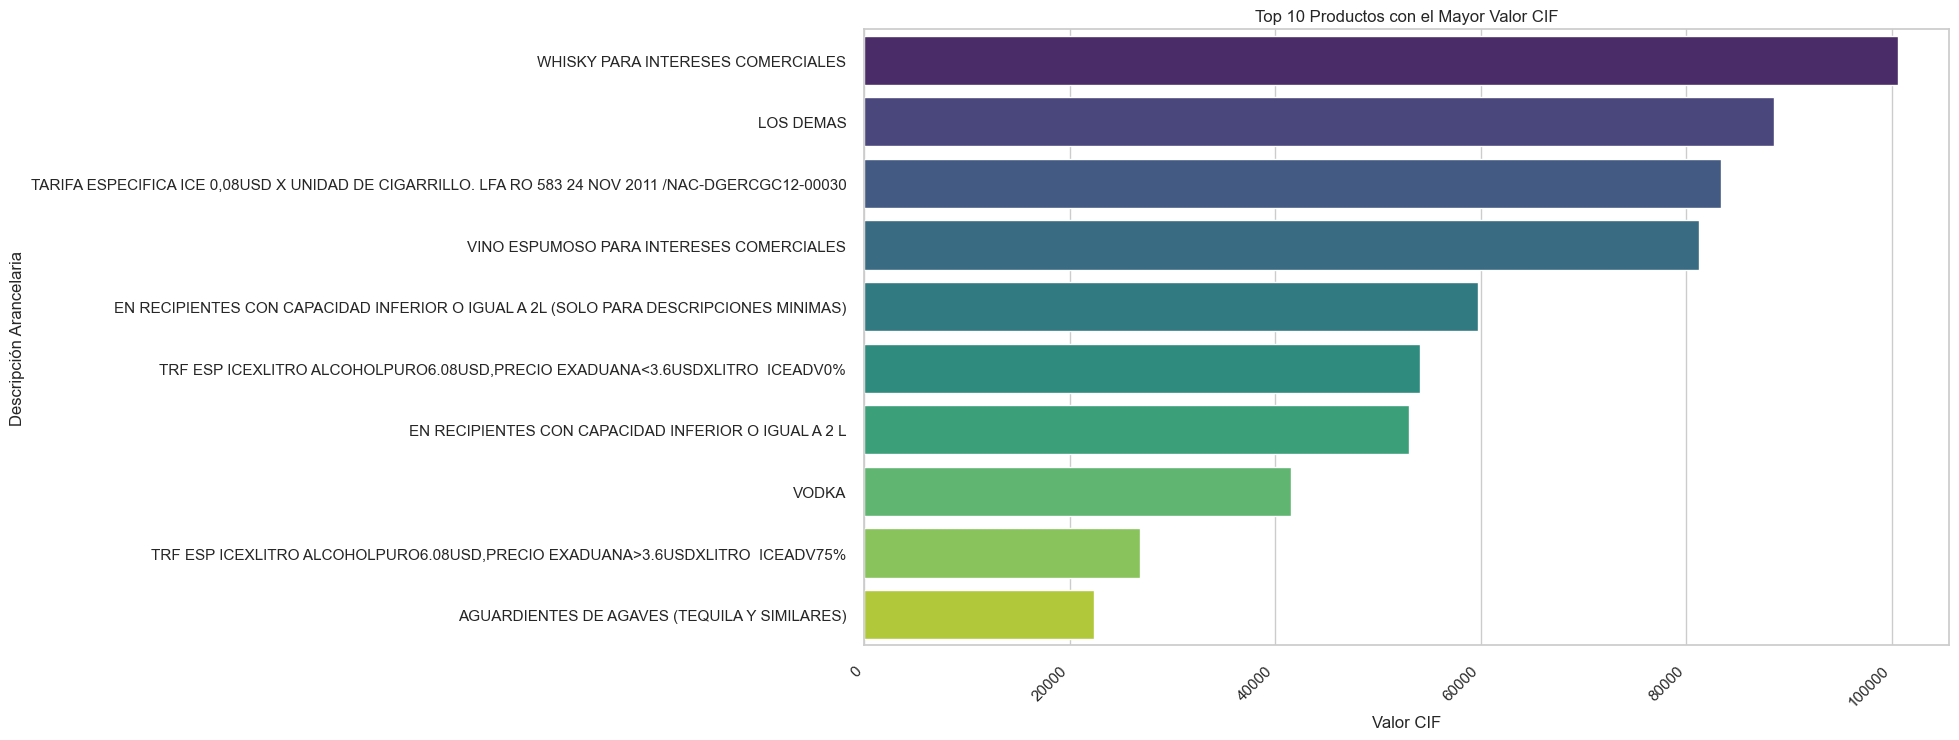

In [37]:
# Agrupar por descripción arancelaria y sumar el valor CIF
productos_cif = df.groupby('DESCRIPCION_ARANCELARIA')['CIF'].sum().sort_values(ascending=False).head(10).reset_index()

# Visualizar los productos con el mayor valor CIF
plt.figure(figsize=(14, 8))
sns.barplot(data=productos_cif, x='CIF', y='DESCRIPCION_ARANCELARIA', hue='DESCRIPCION_ARANCELARIA', palette='viridis')
plt.title('Top 10 Productos con el Mayor Valor CIF')
plt.xlabel('Valor CIF')
plt.ylabel('Descripción Arancelaria')
plt.xticks(rotation=45, ha='right')
plt.show()

                                     CIF  DESCRIPCION_ARANCELARIA_CODIGO
CIF                             1.000000                        0.128112
DESCRIPCION_ARANCELARIA_CODIGO  0.128112                        1.000000


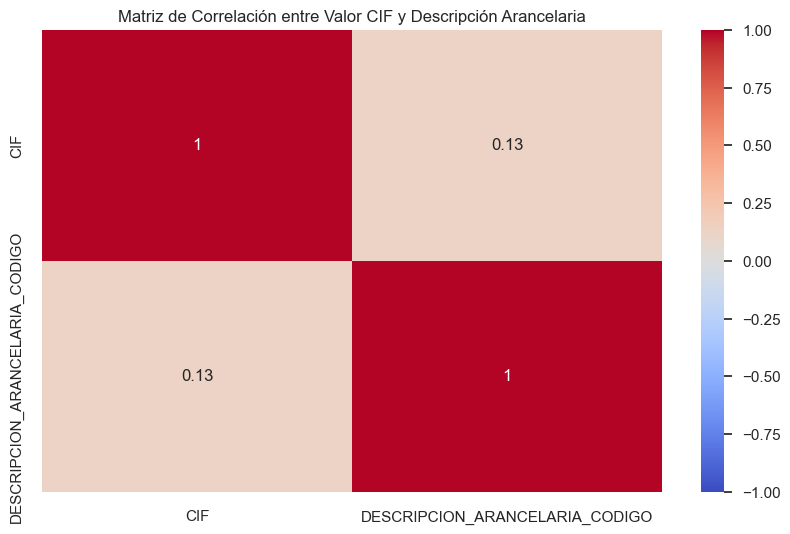

In [38]:
# Para la matriz de correlación, necesitamos convertir variables categóricas en variables numéricas
# Convertimos 'Descripción Arancelaria' en categorías numéricas
df['DESCRIPCION_ARANCELARIA_CODIGO'] = df['DESCRIPCION_ARANCELARIA'].astype('category').cat.codes
# Seleccionar las columnas relevantes para la correlación
df_corr = df[['CIF', 'DESCRIPCION_ARANCELARIA_CODIGO']]
# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()
# Mostrar la matriz de correlación
print(correlation_matrix)
# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Valor CIF y Descripción Arancelaria')
plt.show()

# AVANCE 2 SOFIA GONZALEZ: 
 - visualización geográfica con mapa coroplético
 - análisis de clustering con su respectivo análisis descriptivo que expliquen los grupos de forma significativa
 - modelo supervisado (regresión o clasificación)  que realice la predicción de una salida que esté en su dataset o la obtenga a partir de su análisis de clustering

# PREGUNTA SOFIA GONZALEZ ¿Cuáles son los distritos que realiza importaciones cuya descripción arancelaria="WHISKY PARA INTERESES COMERCIALES"?

In [39]:
df["DISTRITO_UBICACION"]=df.DISTRITO.str.split("-",expand=True)[1].str.split(",",expand=True)
df.DISTRITO_UBICACION #Ubicacion de los distritos en el Ecuador por ciudad

884       GUAYAQUIL 
2205           QUITO
4635      GUAYAQUIL 
12786     GUAYAQUIL 
15028     GUAYAQUIL 
             ...    
599379         QUITO
599982    GUAYAQUIL 
601954         QUITO
610647        CUENCA
611072        CUENCA
Name: DISTRITO_UBICACION, Length: 118, dtype: object

In [40]:
df['TIPO_DISTRITO']=df.DISTRITO.str.split("-",expand=True)[2]
df.TIPO_DISTRITO.unique() #Si el distrito realiza importacion de manera aerea, maritima o desconocida (None)

array([' MARITIMO', None, ' AEREO'], dtype=object)

In [41]:
df['NOMBRE_PAIS']=df.PAIS_ORIGEN.str.split("-",expand=True)[1]
df.NOMBRE_PAIS #Separa el nombre del país de donde vienen las importaciones 
df

FEC_INGRESO                  DISTRITO  \
884     2013-02-05  028-GUAYAQUIL - MARITIMO   
2205    2013-03-07                 055-QUITO   
4635    2013-05-10  028-GUAYAQUIL - MARITIMO   
12786   2013-04-18     019-GUAYAQUIL - AEREO   
15028   2013-04-15  028-GUAYAQUIL - MARITIMO   
...            ...                       ...   
599379  2013-06-26                 055-QUITO   
599982  2013-03-26  028-GUAYAQUIL - MARITIMO   
601954  2013-04-03                 055-QUITO   
610647  2013-04-02                091-CUENCA   
611072  2013-04-01                091-CUENCA   

                                       REGIMEN  \
884                           73-ALMACEN LIBRE   
2205                  10-IMPORTACION A CONSUMO   
4635                  10-IMPORTACION A CONSUMO   
12786                 10-IMPORTACION A CONSUMO   
15028                 10-IMPORTACION A CONSUMO   
...                                        ...   
599379                10-IMPORTACION A CONSUMO   
599982  70-DEPOSITO ADUANERO PUBLICO Y PRIVADO   
601954                10-IMPORTACION A CONSUMO   
610647                10-IMPORTACION A CONSUMO   
611072                10-IMPORTACION A CONSUMO   

                                  DESCRIPCION_ARANCELARIA  \
884                                             LOS DEMAS   
2205                                            LOS DEMAS   
4635                                            LOS DEMAS   
12786   TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   
15028                                           LOS DEMAS   
...                                                   ...   
599379  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
599982  TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   
601954  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
610647  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
611072  TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   

                           PAIS_ORIGEN CONVENIO_INTERNACIONAL  \
884     GB-REINO UNIDO DE GRAN BRETAÑA              NO APLICA   
2205                           CU-CUBA              NO APLICA   
4635                      GT-GUATEMALA              NO APLICA   
12786                      CO-COLOMBIA              NO APLICA   
15028                     GT-GUATEMALA              NO APLICA   
...                                ...                    ...   
599379                       ES-ESPAÑA              NO APLICA   
599982                       ES-ESPAÑA              NO APLICA   
601954                 NL-PAISES BAJOS              NO APLICA   
610647                       ES-ESPAÑA              NO APLICA   
611072                      FR-FRANCIA              NO APLICA   

       TIPO_UNIDAD_FISICA TIPO_UNIDAD_COMERCIAL  PESO_NETO        FOB  ...  \
884              61-LITRO              U-UNIDAD     174.54   1401.200  ...   
2205             61-LITRO              CAJ-CAJA    2843.51  11025.000  ...   
4635             61-LITRO              CAJ-CAJA    1101.52  15346.040  ...   
12786            61-LITRO              U-UNIDAD     257.00    319.200  ...   
15028            61-LITRO              CAJ-CAJA     430.79   6584.060  ...   
...                   ...                   ...        ...        ...  ...   
599379           61-LITRO              CAJ-CAJA    1236.00   7178.402  ...   
599982           61-LITRO              CAJ-CAJA     630.00  13164.200  ...   
601954           61-LITRO          BOT-BOTELLAS    2448.00   5324.730  ...   
610647           61-LITRO              CAJ-CAJA    1434.60   6245.640  ...   
611072           61-LITRO          BOT-BOTELLAS    1202.14   3689.980  ...   

        ADVALOREM  ADVALOREM_ESPECIFICO      LUGAR  FECHA  IMP_ADVALOREM  \
884         15.51                1235.0  NO APLICA   None         647.23   
2205       115.90               15750.0  NO APLICA   None        6417.72   
4635       156.88               11790.0  NO APLICA   None        6369.20   
12786        7.12                 513.0  NO APLICA   None         172.52  

In [42]:
df.DESCRIPCION_ARANCELARIA.unique

<bound method Series.unique of 884                                               LOS DEMAS
2205                                              LOS DEMAS
4635                                              LOS DEMAS
12786     TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...
15028                                             LOS DEMAS
                                ...                        
599379    EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...
599982    TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...
601954    EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...
610647    EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...
611072    TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...
Name: DESCRIPCION_ARANCELARIA, Length: 118, dtype: object>

In [43]:
world = gdf.merge(df, how="left", left_on="DPA_DESCAN", right_on="DISTRITO_UBICACION") #Une el gdf con el df original
filtered_world = world[world['DESCRIPCION_ARANCELARIA'] == "WHISKY PARA INTERESES COMERCIALES"]
filtered_world

DPA_VALOR DPA_ANIO DPA_CANTON DPA_DESCAN DPA_PROVIN DPA_DESPRO  PCODE2  \
0            0     2011       0101     CUENCA         01      AZUAY  EC0101   
194          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
195          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
196          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
197          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
198          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
199          0     2011       1701      QUITO         17  PICHINCHA  EC1701   

                                              geometry FEC_INGRESO  \
0    MULTIPOLYGON (((-79.39303 -2.49798, -79.39052 ...  2013-04-08   
194  MULTIPOLYGON (((-78.29853 0.15793, -78.30100 0...  2013-02-23   
195  MULTIPOLYGON (((-78.29853 0.15793, -78.30100 0...  2013-02-07   
196  MULTIPOLYGON (((-78.29853 0.15793, -78.30100 0...  2013-05-08   
197  MULTIPOLYGON (((-78.29853 0.15793, -78.30100 0...  2013-05-21   
198  MULTIPOLYGON (((-78.29853 0.15793, -78.30100 0...  2013-01-23   
199  MULTIPOLYGON (((-78.29853 0.15793, -78.30100 0...  2013-01-28   

       DISTRITO  ... ADVALOREM ADVALOREM_ESPECIFICO      LUGAR FECHA  \
0    091-CUENCA  ...     59.45               2025.0  NO APLICA  None   
194   055-QUITO  ...    137.73               9000.0  NO APLICA  None   
195   055-QUITO  ...    145.19               4050.0  NO APLICA  None   
196   055-QUITO  ...    206.59              13500.0  NO APLICA  None   
197   055-QUITO  ...     16.06                434.1  NO APLICA  None   
198   055-QUITO  ...    354.47                  0.0  NO APLICA  None   
199   055-QUITO  ...   2638.71                  0.0  NO APLICA  None   

    IMP_ADVALOREM IMP_RELATIVO  DESCRIPCION_ARANCELARIA_CODIGO  \
0         1819.41     0.312429                            16.0   
194       5262.86     0.389841                            16.0   
195       4225.31     0.297139                            16.0   
196       7894.28     0.389841                            16.0   
197        464.03     0.301514                            16.0   
198        827.57     0.487064                            16.0   
199       6099.22     0.498897                            16.0   

     DISTRITO_UBICACION  TIPO_DISTRITO                  NOMBRE_PAIS  
0                CUENCA           None  REINO UNIDO DE GRAN BRETAÑA  
194               QUITO           None  REINO UNIDO DE GRAN BRETAÑA  
195               QUITO           None  REINO UNIDO DE GRAN BRETAÑA  
196               QUITO           None  REINO UNIDO DE GRAN BRETAÑA  
197               QUITO           None  REINO UNIDO DE GRAN BRETAÑA  
198               QUITO           None                      UCRANIA  
199               QUITO           None                      UCRANIA  

[7 rows x 39 columns]

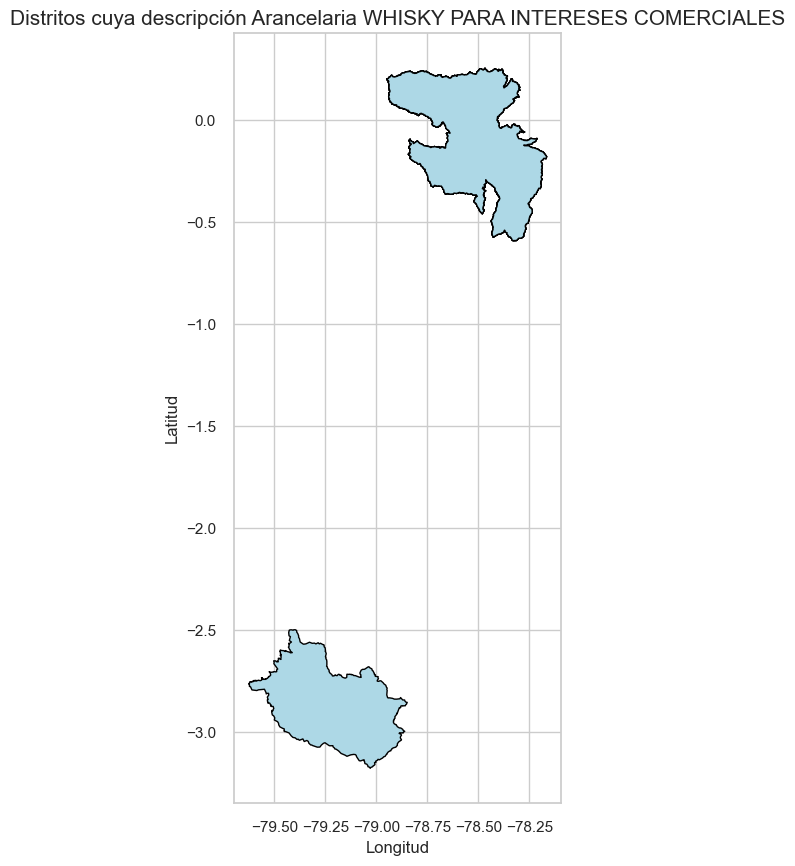

In [44]:
# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotear el mapa usando geopandas
filtered_world.plot(ax=ax, color='lightblue', edgecolor='black')
# Configurar el título y etiquetas
ax.set_title('Distritos cuya descripción Arancelaria WHISKY PARA INTERESES COMERCIALES', fontsize=15)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)
# Mostrar el gráfico
plt.show()

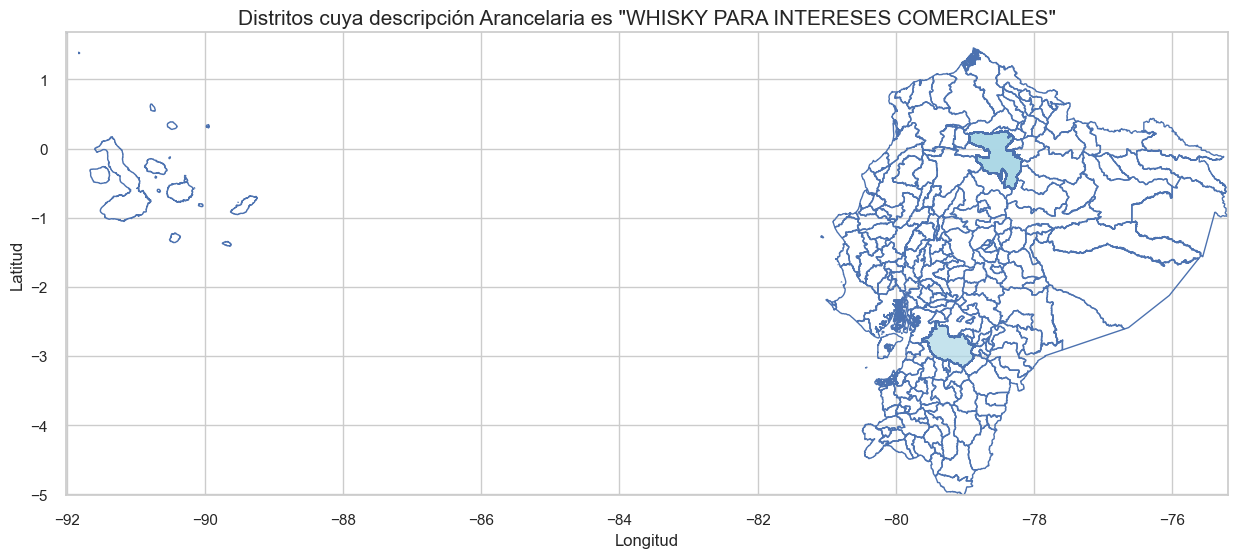

In [45]:
# Crear la figura y el eje
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Dibujar el mapa base del mundo
world.boundary.plot(ax=ax, linewidth=1)
# Plotear el DataFrame filtrado sobre el mapa base
filtered_world.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.7)
# Configurar el título y etiquetas
ax.set_title('Distritos cuya descripción Arancelaria es "WHISKY PARA INTERESES COMERCIALES"', fontsize=15)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)
# Configurar los límites del gráfico para mostrar todo el mapa
ax.set_xlim(world.total_bounds[[0, 2]])
ax.set_ylim(world.total_bounds[[1, 3]])
# Mostrar el gráfico
plt.show()

# PREGUNTA SOFIA GONZALEZ: Análisis de clustering

In [46]:
df.columns

Index(['FEC_INGRESO', 'DISTRITO', 'REGIMEN', 'DESCRIPCION_ARANCELARIA',
       'PAIS_ORIGEN', 'CONVENIO_INTERNACIONAL', 'TIPO_UNIDAD_FISICA',
       'TIPO_UNIDAD_COMERCIAL', 'PESO_NETO', 'FOB', 'FLETE', 'SEGURO', 'CIF',
       'CANTIDAD_FISICA', 'CANTIDAD_COMERCIAL', 'SALVAGUARDIA',
       'SALVAGUARDIA_ESPECIFICA', 'FODINFA', 'ICE_ADVALOREM', 'ICE_ESPECIFICO',
       'IVA', 'ADVALOREM', 'ADVALOREM_ESPECIFICO', 'LUGAR', 'FECHA',
       'IMP_ADVALOREM', 'IMP_RELATIVO', 'DESCRIPCION_ARANCELARIA_CODIGO',
       'DISTRITO_UBICACION', 'TIPO_DISTRITO', 'NOMBRE_PAIS'],
      dtype='object')

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

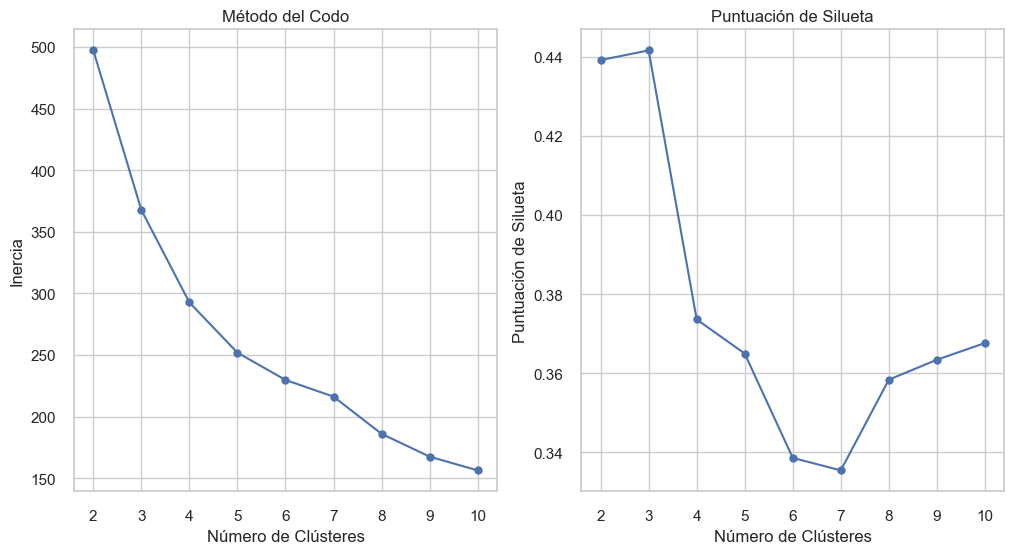

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


           PESO_NETO           FOB       FLETE     SEGURO           CIF  \
Cluster                                                                   
0         207.947190   2312.980345   49.895121  16.600172   2379.475638   
1         849.084250  11595.055375  279.136375  91.732083  11965.923833   
2        1264.686677   5906.407419  259.997581  26.238419   6192.643419   
3        3487.400000   7302.218000  615.868800  46.264000   7964.350800   

         CANTIDAD_FISICA  CANTIDAD_COMERCIAL  SALVAGUARDIA  \
Cluster                                                      
0             227.337241          156.775862           0.0   
1             797.622917          371.166667           0.0   
2            1072.161290          742.548387           0.0   
3            2893.800000         3554.400000           0.0   

         SALVAGUARDIA_ESPECIFICA    FODINFA  ICE_ADVALOREM  ICE_ESPECIFICO  \
Cluster                                                                      
0                   

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


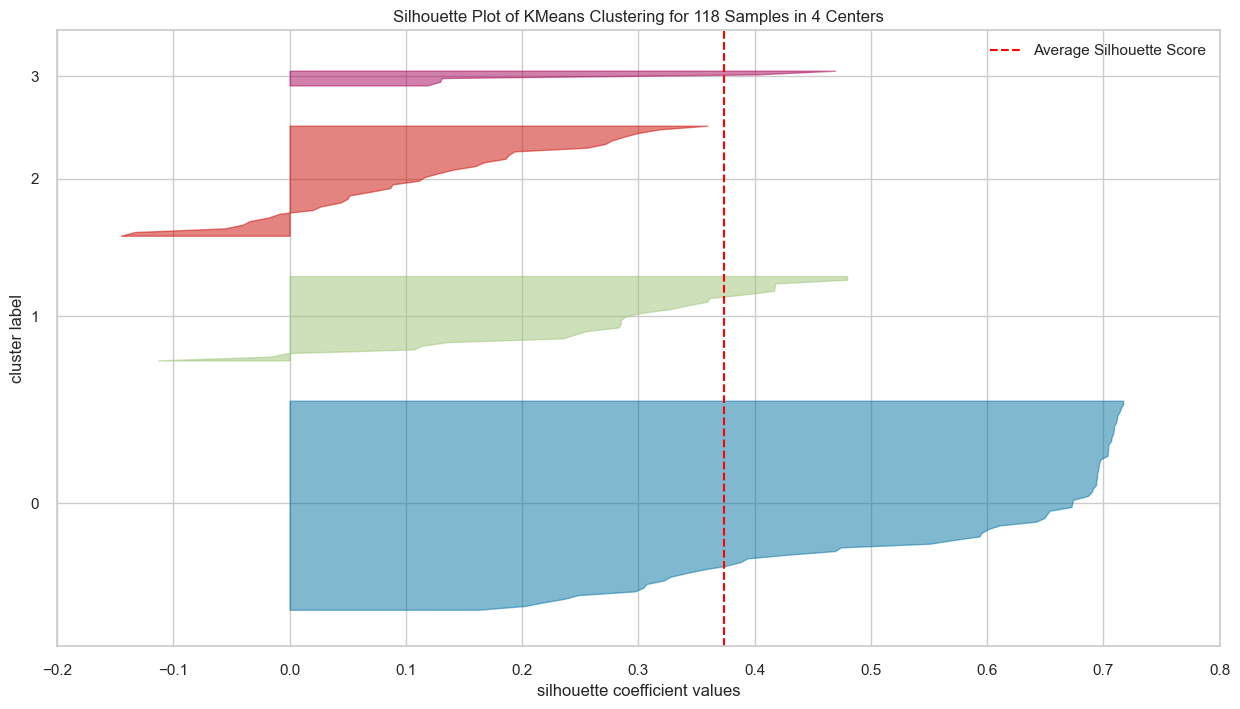

In [47]:
# Seleccionar y preprocesar las variables numéricas
features = df[['FOB', 'FLETE', 'SEGURO', 'CIF', 'PESO_NETO', 'CANTIDAD_FISICA', 'CANTIDAD_COMERCIAL']]
features = features.apply(pd.to_numeric, errors='coerce')  # Convertir a numérico
features = features.fillna(0)  # Reemplazar valores nulos

# Normalización
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Determinar el número óptimo de clústeres
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Crear un DataFrame para visualizar el codo

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Puntuación de Silueta')
plt.xlabel('Número de Clústeres')
plt.ylabel('Puntuación de Silueta')

plt.show()

# Aplicar K-Means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=4, random_state=0).fit(features_scaled)
df['Cluster'] = kmeans.labels_

# Análisis descriptivo de los clústeres
numeric_cols = df.select_dtypes(include='number')
cluster_summary = df.groupby('Cluster')[numeric_cols.columns].mean()
print(cluster_summary)


kmeans.fit(features_scaled)
plt.figure(figsize=(15,8))
silhouette_visualizer(kmeans,features_scaled,colors='yellowbrick');


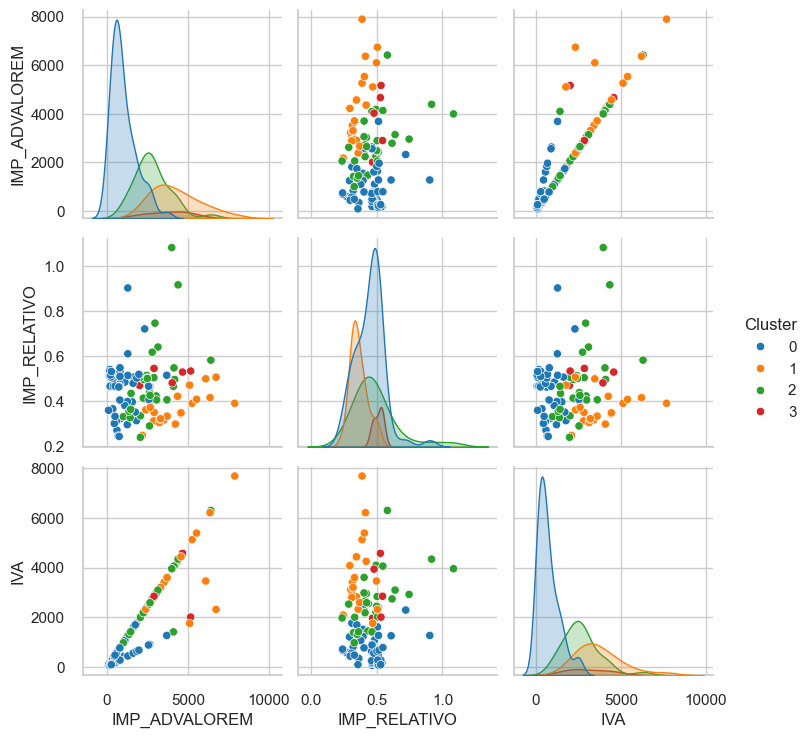

In [48]:
#num1=numeric_cols[['CANTIDAD_FISICA','PESO_NETO','IVA']]
sns.pairplot(data=numeric_cols[['Cluster','IMP_ADVALOREM','IMP_RELATIVO','IVA']],hue='Cluster',palette="tab10")

In [49]:
#sns.pairplot(data=numeric_cols,hue='Cluster',palette="tab10")

El Clúster 0 agrupa importaciones con valores bajos en la mayoría de las métricas, lo que podría indicar productos de bajo valor o cantidades pequeñas. La ausencia de salvaguardias y tasas impositivas bajas sugieren que estos productos pueden estar sujetos a menores regulaciones o aranceles.
El Clúster 1 representa importaciones de alto valor, con grandes cantidades físicas y comerciales. Los altos valores en FOB, CIF, y costos asociados sugieren productos de alta gama o más costosos. La ausencia de salvaguardias indica que estos productos no están sujetos a restricciones adicionales específicas.
El Clúster 2 agrupa importaciones de valores y cantidades intermedios. Los costos asociados son moderados, lo que podría indicar productos que no son ni de lujo ni de bajo costo. La ausencia de salvaguardias y tasas impositivas moderadas sugiere que estos productos enfrentan regulaciones estándar.
El Clúster 3 representa importaciones con las mayores cantidades físicas y comerciales. Los costos de flete son significativamente altos, lo que podría indicar grandes envíos o productos voluminosos. Los valores intermedios a altos en FOB, CIF y otros costos asociados reflejan productos grandes o pesados, posiblemente relacionados con maquinaria o productos en grandes cantidades.

**Conclusión General**
   - Clúster 0: Productos de bajo valor y volumen.
   - Clúster 1: Productos de alto valor y gran volumen.
   - Clúster 2: Productos con valores y volúmenes intermedios.
   - Clúster 3: Productos con gran volumen y costos de flete altos.

# PREGUNTA SOFIA GONZALEZ MODELO SUPERVISADO REGRESION PARA PREDECIR FOB

In [50]:
# Definir las características (X) y la variable objetivo (y)
X = df[['FLETE', 'SEGURO', 'CIF', 'PESO_NETO', 'CANTIDAD_FISICA', 'CANTIDAD_COMERCIAL']]
y = df['FOB']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MSE: 7.232355314551912e-24
R^2: 1.0


MSE (Error Cuadrático Medio): el modelo ha hecho predicciones muy precisas en comparación con los valores reales. Al ser un valor muy cercano a cero, indica que las diferencias entre las predicciones y los valores reales son prácticamente inexistentes.
R^2: las predicciones del modelo se ajustan perfectamente a los datos reales.
**CONCLUSION**:
- El modelo es capaz de prever el valor FOB con una precisión muy alta, lo que es beneficioso para planificar costos y gestionar la logística de manera eficiente.
- Todas las variaciones en los costos FOB pueden ser explicadas por las características que se han incluido en el modelo (como FLETE, SEGURO, CIF, etc.). Esto es ideal y sugiere que el modelo es perfecto en términos de ajuste a los datos de prueba.

# PREGUNTA OSCAR SANCHEZ: ¿Cómo ha evolucionado el volumen de importaciones a lo largo del tiempo?

In [51]:
# Creando copia del dataset
dfcopia = df.copy()

# Agregando columna mes
dfcopia['MES'] = dfcopia.FEC_INGRESO.dt.month_name(locale="es")

In [52]:
# Agrupando por volumen
servolumen = dfcopia.groupby("MES", sort=False)["CANTIDAD_FISICA"].sum()
mesesord = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio"]
servolumen = servolumen.loc[mesesord]

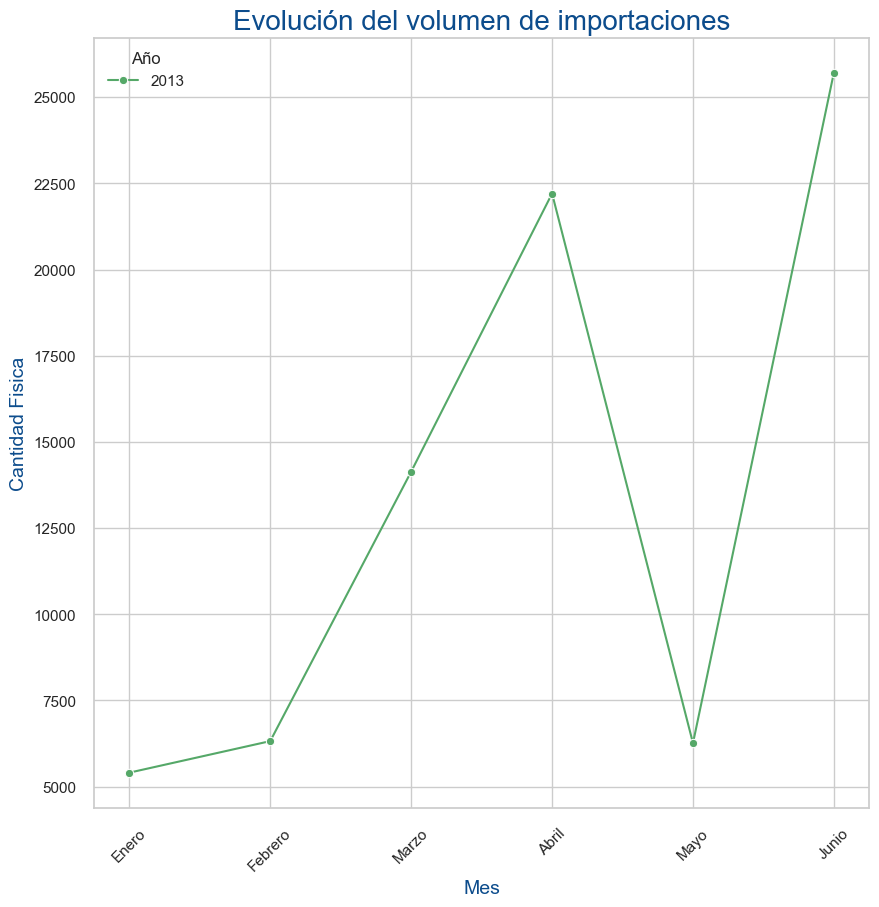

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
_ = sns.lineplot(servolumen,ax=ax, color="g", marker="o", mfc = "g", label="2013")
_ = ax.set_ylabel("Cantidad Fisica", {"fontsize":14, "color": "#0C4C8C"})
_ = ax.set_xlabel("Mes", {"fontsize":14, "color": "#0C4C8C"})
_ = ax.set_title("Evolución del volumen de importaciones", fontsize=20, color='#0C4C8C')
_ = plt.xticks(rotation = 45)
_ = ax.legend(title="Año")

# PREGUNTA OSCAR SANCHEZ: ¿Cuál es la distribución de los costos (FOB, flete, seguro, CIF) en función del país de origen?

In [54]:
# Calculando el costo total y el porcentaje de cada componente
dfcopia['COSTO_TOTAL'] = dfcopia['FOB'] + dfcopia['FLETE'] + dfcopia['SEGURO']
dfcopia['PORC_FOB'] = dfcopia['FOB'] / dfcopia['COSTO_TOTAL'] * 100
dfcopia['PORC_FLETE'] = dfcopia['FLETE'] / dfcopia['COSTO_TOTAL'] * 100
dfcopia['PORC_SEGURO'] = dfcopia['SEGURO'] / dfcopia['COSTO_TOTAL'] * 100

In [55]:
# Agrupando
costos_por_pais = dfcopia.groupby('PAIS_ORIGEN').agg({
    'PORC_FOB': 'mean',
    'PORC_FLETE': 'mean',
    'PORC_SEGURO': 'mean',
    'CIF': 'mean'
}).reset_index()

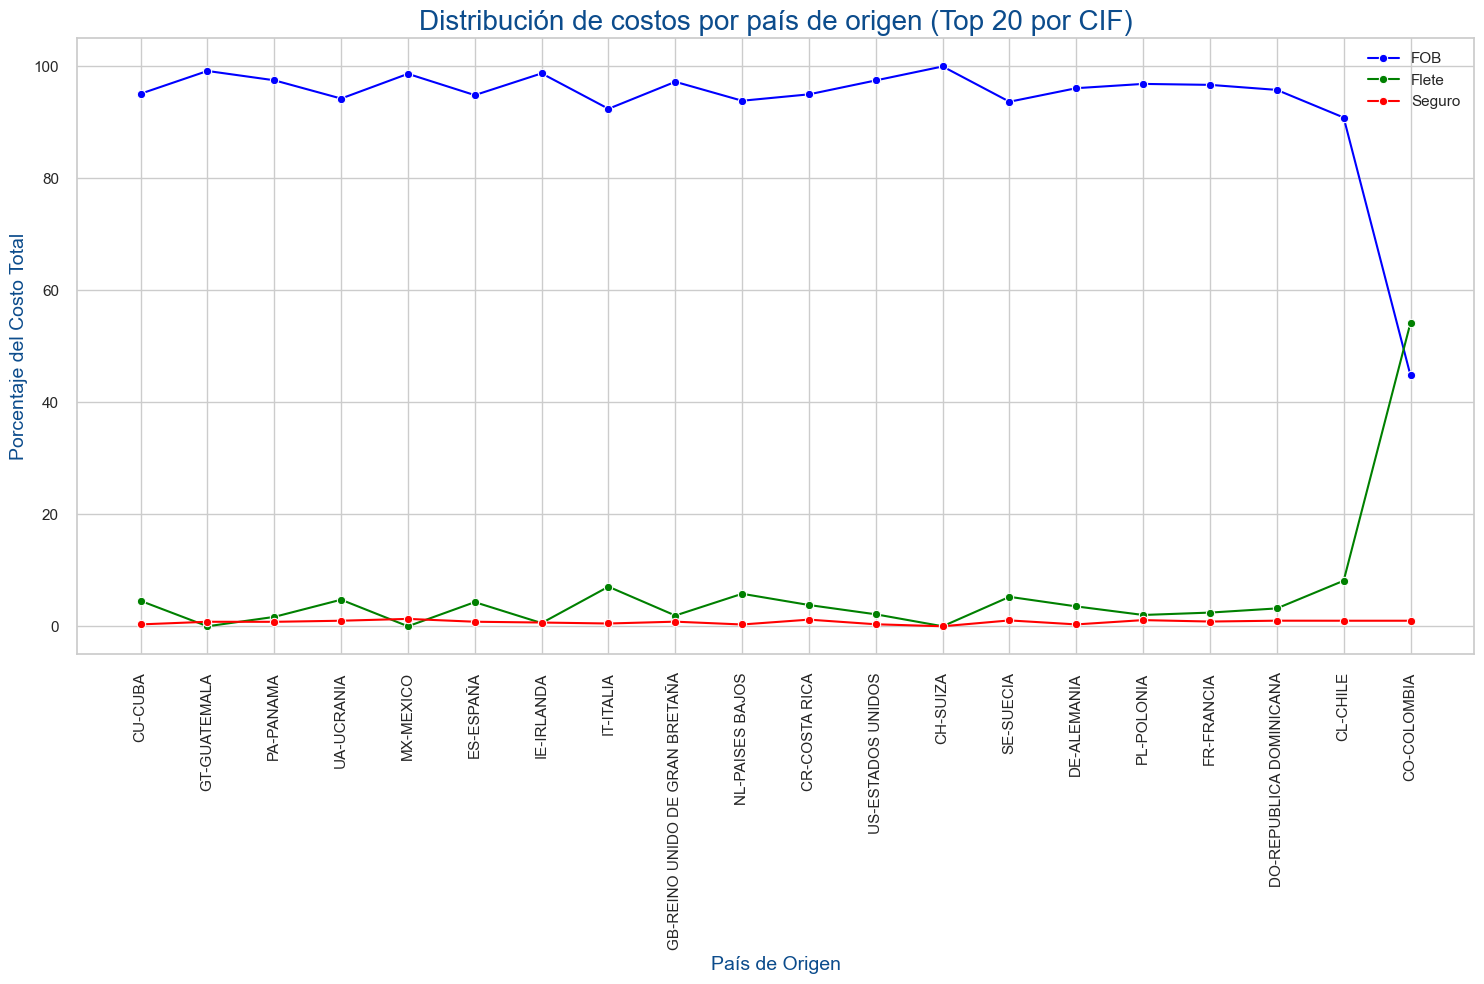

In [56]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(15,10))
# Filtrar los datos para los 20 principales países por CIF
costostop = costos_por_pais.sort_values('CIF', ascending=False).head(20)
# Plotear la línea para cada tipo de costo
sns.lineplot(x='PAIS_ORIGEN', y='PORC_FOB', data=costostop, marker='o', label='FOB', color='blue', ax=ax)
sns.lineplot(x='PAIS_ORIGEN', y='PORC_FLETE', data=costostop, marker='o', label='Flete', color='green', ax=ax)
sns.lineplot(x='PAIS_ORIGEN', y='PORC_SEGURO', data=costostop, marker='o', label='Seguro', color='red', ax=ax)
# Configurar título y etiquetas
ax.set_title('Distribución de costos por país de origen (Top 20 por CIF)', fontsize=20, color='#0C4C8C')
ax.set_xlabel('País de Origen', fontsize=14, color='#0C4C8C')
ax.set_ylabel('Porcentaje del Costo Total', fontsize=14, color='#0C4C8C')
# Rotar etiquetas del eje x para mejor visibilidad
ax.tick_params(axis='x', rotation=90)
# Añadir leyenda
ax.legend()
# Mostrar el gráfico
plt.tight_layout()
plt.show()

# PREGUNTA OSCAR SANCHEZ: ¿Hay diferencias significativas entre los países?

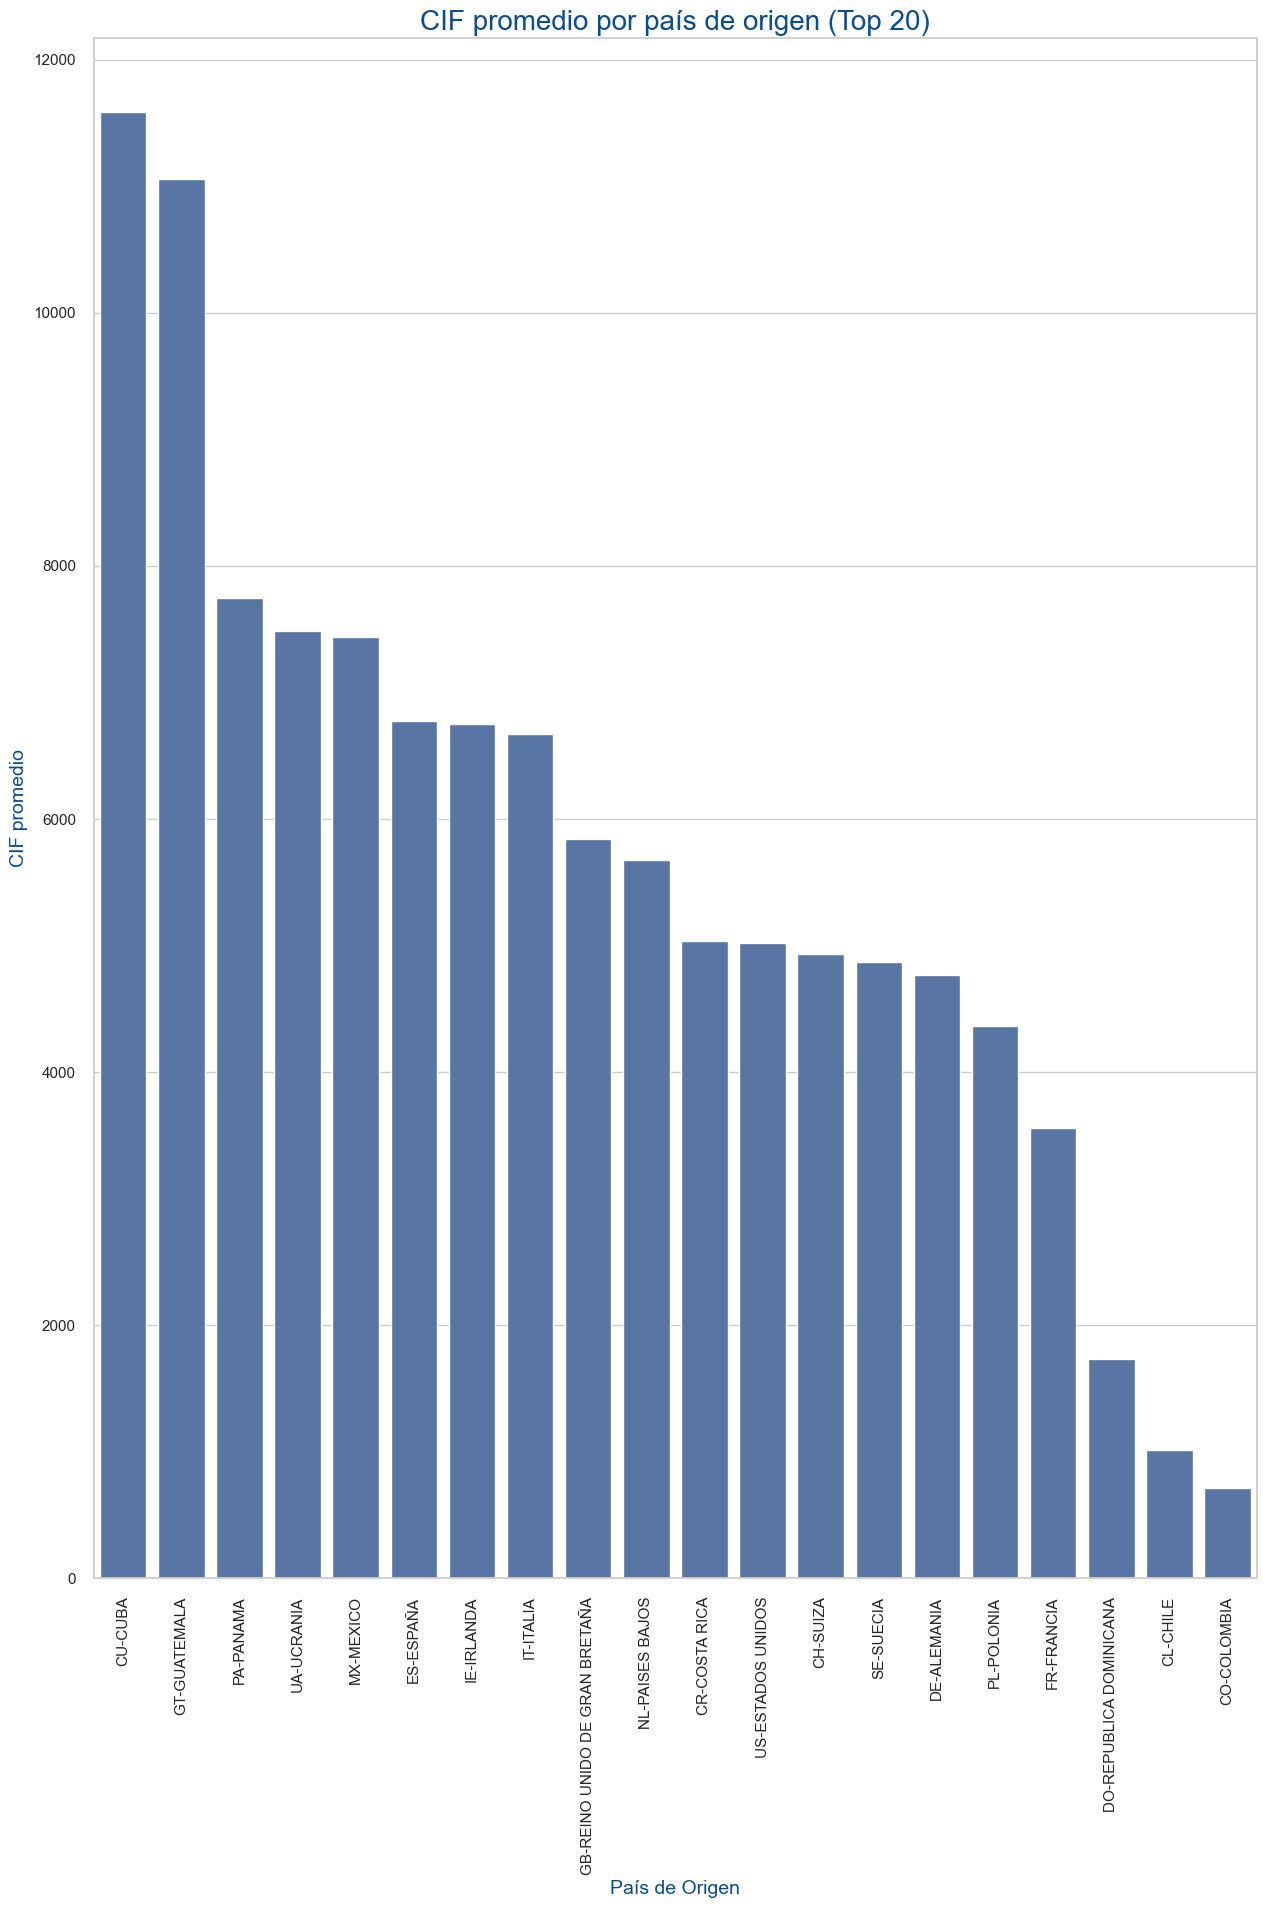

In [57]:
fig, ax = plt.subplots(figsize=(15,20))
_ = sns.barplot(x='PAIS_ORIGEN', y='CIF', ax=ax, data=costostop)
_ = ax.set_title('CIF promedio por país de origen (Top 20)', fontsize=20, color='#0C4C8C')
_ = ax.set_xlabel('País de Origen', {"fontsize":14, "color": "#0C4C8C"})
_ = ax.set_ylabel('CIF promedio', {"fontsize":14, "color": "#0C4C8C"})
_ = plt.xticks(rotation=90)

# AVANCE 2 Oscar Sanchez

## Visualización geográfica con mapa coroplético
¿Cuáles son los distritos con mayor valor de importaciones (FOB) en Ecuador?

In [58]:
dfoscar = df.reset_index(drop=True)
dfoscar.drop(columns="Cluster", inplace=True)
dfoscar.loc[dfoscar.DISTRITO_UBICACION == 'GUAYAQUIL ', 'DISTRITO_UBICACION'] = "GUAYAQUIL"

In [59]:
gjoin = gdf.merge(dfoscar, how="right", left_on="DPA_DESCAN", right_on="DISTRITO_UBICACION")

In [60]:
paises = gjoin.groupby(['DISTRITO_UBICACION', 'geometry']).agg({
    'FOB': 'sum',
}).reset_index()
paises.columns = ['DISTRITO_UBICACION', 'geometry', 'TOTAL_FOB']
gpaises = gpd.GeoDataFrame(paises, geometry=paises.geometry)
gpaises.crs = gdf.crs

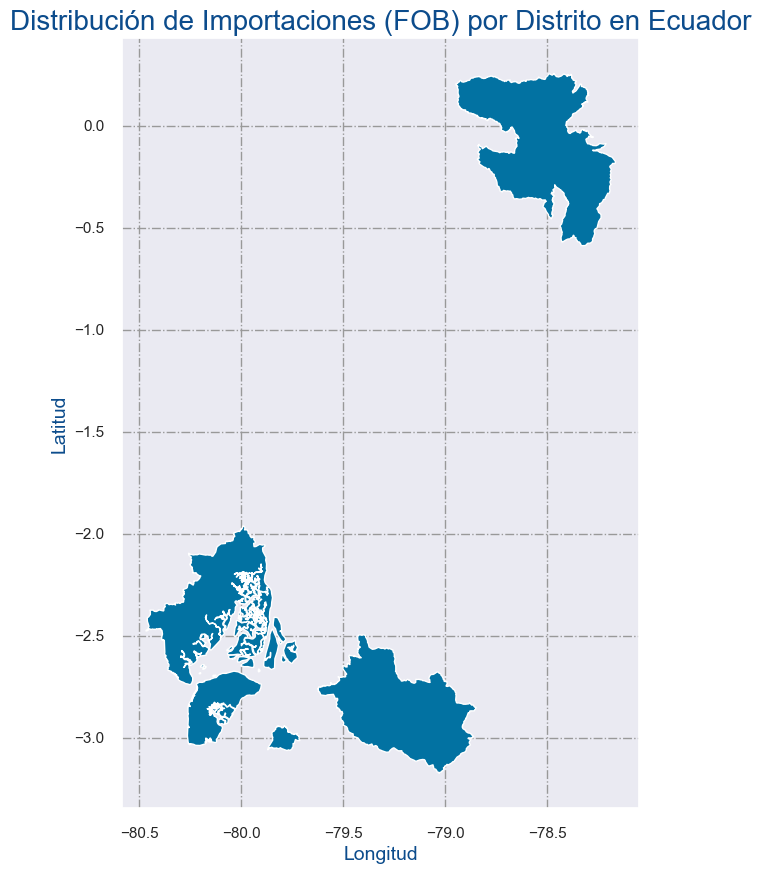

In [61]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": "-."})
fig, ax = plt.subplots(figsize=(15, 10))
_ = gpaises.plot(ax=ax)
# Configurar el título y etiquetas
_ = ax.set_title('Distribución de Importaciones (FOB) por Distrito en Ecuador', fontsize=20, color='#0C4C8C')
_ = ax.set_xlabel('Longitud', {"fontsize":14, "color": "#0C4C8C"})
_ = ax.set_ylabel('Latitud', {"fontsize":14, "color": "#0C4C8C"})

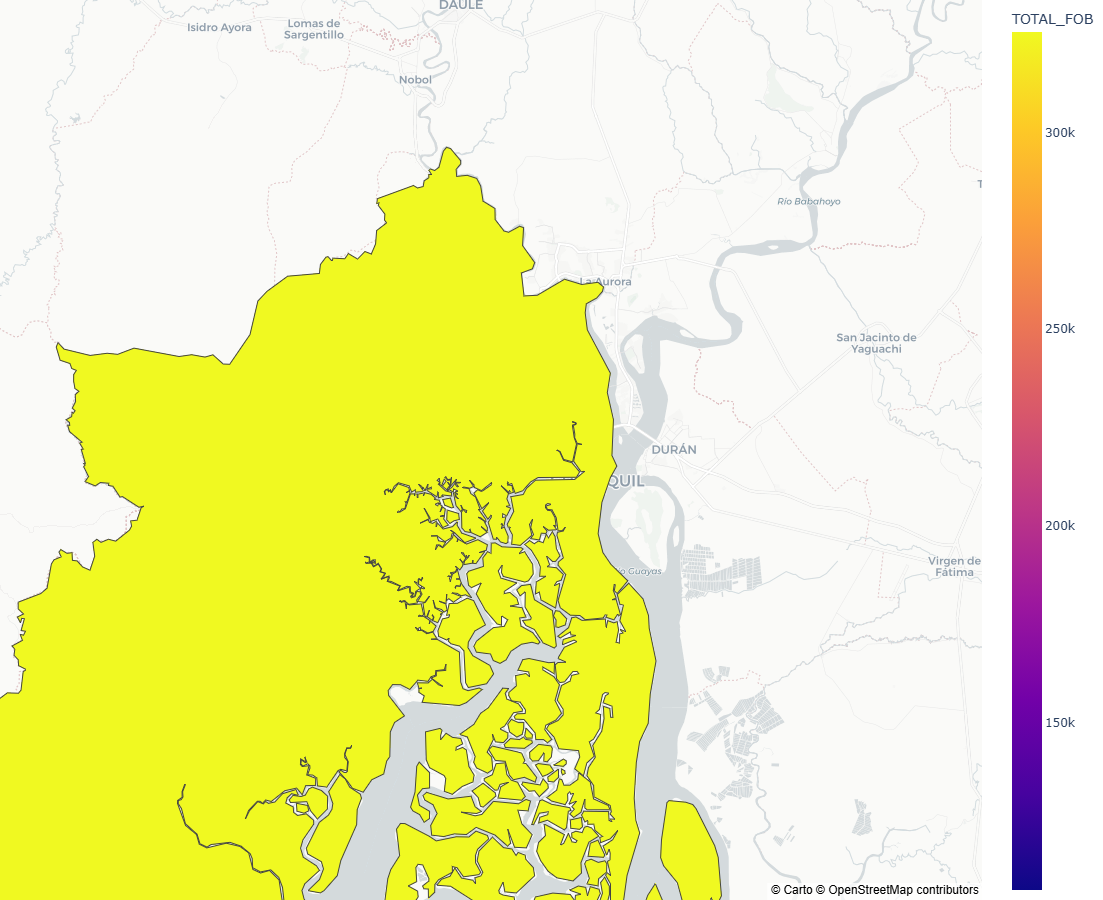

In [62]:
# Visualización geográfica con mapa coroplético
fig = px.choropleth_mapbox(gpaises,
    geojson=gpaises.geometry,
    locations=gpaises.index,
    color="TOTAL_FOB",
    mapbox_style="carto-positron",
    center={"lat": -2.17, "lon": -79.96},
    zoom=10
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(autosize=False, margin={"r":0,"t":0,"l":0,"b":0}, width=900, height=900)
# fig.show()

In [63]:
gpaises.drop(columns="geometry")

DISTRITO_UBICACION   TOTAL_FOB
0             CUENCA  107641.350
1          GUAYAQUIL  325470.916
2              QUITO  198931.643

## Análisis de clustering
¿Existen patrones en la distribución de las importaciones según el distrito, régimen y tipo de unidad física/comercial?

In [64]:
columns = ['FODINFA', 'ICE_ADVALOREM', 'IVA']
x = df[columns]

In [65]:
scaler = StandardScaler()
scaler.fit(x)
x_norm = scaler.transform(x)
x_norm = pd.DataFrame(x_norm, columns=['FODINFA', 'ICE_ADVALOREM', 'IVA'])

In [66]:
k_values = np.arange(2, 6)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_norm)
    silhouette_scores.append(silhouette_score(x_norm, kmeans.labels_))

# Seleccionar k con mayor puntuación de silueta
k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Realizar k-means con k seleccionado
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_norm)

# Asignar clusters a cada aerolínea
dfoscar['CLUSTER'] = kmeans.labels_

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak o

In [67]:
for cluster in dfoscar['CLUSTER'].unique():
    grupo = dfoscar[dfoscar['CLUSTER'] == cluster]
    print(f'Grupo {cluster}:')
    print(f'FODINFA: {grupo["FODINFA"].mean()}')
    print(f'ICE_ADVALOREM: {grupo["ICE_ADVALOREM"].mean()}')
    print(f'IVA: {grupo["IVA"].mean()}')
    print()

Grupo 1:
FODINFA: 14.487611940298509
ICE_ADVALOREM: 2004.8505970149256
IVA: 799.7589552238807

Grupo 0:
FODINFA: 46.15960784313725
ICE_ADVALOREM: 11296.981176470586
IVA: 3408.345294117647



__GRUPO 0__   
Este grupo parece representar importaciones con un bajo valor FODINFA, lo que podría indicar que no están relacionadas con el fondo FODINFA o que tienen un bajo impacto en el mismo. El valor ICE_ADVALOREM es moderado, lo que sugiere que se aplican impuestos y aranceles significativos a estas importaciones. El valor IVA también es moderado, lo que indica que se pagan impuestos sobre el valor agregado de estas importaciones.

__GRUPO 1__    
Este grupo parece representar importaciones con un alto valor FODINFA, lo que podría indicar que están relacionadas con el fondo FODINFA o que tienen un alto impacto en el mismo. El valor ICE_ADVALOREM es alto, lo que sugiere que se aplican impuestos y aranceles significativos a estas importaciones. El valor IVA también es alto, lo que indica que se pagan impuestos sobre el valor agregado de estas importaciones.

__Comparación entre grupos__
- El Grupo 1 tiene un valor FODINFA significativamente más alto que el Grupo 0, lo que sugiere que las importaciones en este grupo están más relacionadas con el fondo FODINFA.
- El Grupo 1 también tiene valores ICE_ADVALOREM y IVA significativamente más altos que el Grupo 0, lo que indica que se aplican más impuestos y aranceles a las importaciones en este grupo.

En resumen, los grupos obtenidos mediante K-means sugieren que existen dos patrones diferentes en las importaciones:
- Un grupo con un bajo valor FODINFA, impuestos y aranceles moderados (Grupo 0).
- Un grupo con un alto valor FODINFA, impuestos y aranceles altos (Grupo 1).

In [68]:
df

FEC_INGRESO                  DISTRITO  \
884     2013-02-05  028-GUAYAQUIL - MARITIMO   
2205    2013-03-07                 055-QUITO   
4635    2013-05-10  028-GUAYAQUIL - MARITIMO   
12786   2013-04-18     019-GUAYAQUIL - AEREO   
15028   2013-04-15  028-GUAYAQUIL - MARITIMO   
...            ...                       ...   
599379  2013-06-26                 055-QUITO   
599982  2013-03-26  028-GUAYAQUIL - MARITIMO   
601954  2013-04-03                 055-QUITO   
610647  2013-04-02                091-CUENCA   
611072  2013-04-01                091-CUENCA   

                                       REGIMEN  \
884                           73-ALMACEN LIBRE   
2205                  10-IMPORTACION A CONSUMO   
4635                  10-IMPORTACION A CONSUMO   
12786                 10-IMPORTACION A CONSUMO   
15028                 10-IMPORTACION A CONSUMO   
...                                        ...   
599379                10-IMPORTACION A CONSUMO   
599982  70-DEPOSITO ADUANERO PUBLICO Y PRIVADO   
601954                10-IMPORTACION A CONSUMO   
610647                10-IMPORTACION A CONSUMO   
611072                10-IMPORTACION A CONSUMO   

                                  DESCRIPCION_ARANCELARIA  \
884                                             LOS DEMAS   
2205                                            LOS DEMAS   
4635                                            LOS DEMAS   
12786   TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   
15028                                           LOS DEMAS   
...                                                   ...   
599379  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
599982  TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   
601954  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
610647  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
611072  TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   

                           PAIS_ORIGEN CONVENIO_INTERNACIONAL  \
884     GB-REINO UNIDO DE GRAN BRETAÑA              NO APLICA   
2205                           CU-CUBA              NO APLICA   
4635                      GT-GUATEMALA              NO APLICA   
12786                      CO-COLOMBIA              NO APLICA   
15028                     GT-GUATEMALA              NO APLICA   
...                                ...                    ...   
599379                       ES-ESPAÑA              NO APLICA   
599982                       ES-ESPAÑA              NO APLICA   
601954                 NL-PAISES BAJOS              NO APLICA   
610647                       ES-ESPAÑA              NO APLICA   
611072                      FR-FRANCIA              NO APLICA   

       TIPO_UNIDAD_FISICA TIPO_UNIDAD_COMERCIAL  PESO_NETO        FOB  ...  \
884              61-LITRO              U-UNIDAD     174.54   1401.200  ...   
2205             61-LITRO              CAJ-CAJA    2843.51  11025.000  ...   
4635             61-LITRO              CAJ-CAJA    1101.52  15346.040  ...   
12786            61-LITRO              U-UNIDAD     257.00    319.200  ...   
15028            61-LITRO              CAJ-CAJA     430.79   6584.060  ...   
...                   ...                   ...        ...        ...  ...   
599379           61-LITRO              CAJ-CAJA    1236.00   7178.402  ...   
599982           61-LITRO              CAJ-CAJA     630.00  13164.200  ...   
601954           61-LITRO          BOT-BOTELLAS    2448.00   5324.730  ...   
610647           61-LITRO              CAJ-CAJA    1434.60   6245.640  ...   
611072           61-LITRO          BOT-BOTELLAS    1202.14   3689.980  ...   

        ADVALOREM_ESPECIFICO      LUGAR  FECHA  IMP_ADVALOREM  IMP_RELATIVO  \
884                   1235.0  NO APLICA   None         647.23      0.461911   
2205                 15750.0  NO APLICA   None        6417.72      0.582106   
4635                 11790.0  NO APLICA   None        6369.20      0.415039   
12786                  513.0  NO APLICA   None         172.52 

In [69]:
dfjohn = df.reset_index(drop=True)
dfjohn.drop(columns="Cluster", inplace=True)

In [70]:
# Eliminación de valores atípicos basados en percentiles
q1 = dfjohn[['FOB', 'PESO_NETO', 'CIF', 'ADVALOREM']].quantile(0.25)
q3 = dfjohn[['FOB', 'PESO_NETO', 'CIF', 'ADVALOREM']].quantile(0.75)
iqr = q3 - q1

dfjohn_cleaned = dfjohn[~((dfjohn[['FOB', 'PESO_NETO', 'CIF', 'ADVALOREM']] < (q1 - 1.5 * iqr)) |
                           (dfjohn[['FOB', 'PESO_NETO', 'CIF', 'ADVALOREM']] > (q3 + 1.5 * iqr))).any(axis=1)]

In [71]:
dfjohn.columns

Index(['FEC_INGRESO', 'DISTRITO', 'REGIMEN', 'DESCRIPCION_ARANCELARIA',
       'PAIS_ORIGEN', 'CONVENIO_INTERNACIONAL', 'TIPO_UNIDAD_FISICA',
       'TIPO_UNIDAD_COMERCIAL', 'PESO_NETO', 'FOB', 'FLETE', 'SEGURO', 'CIF',
       'CANTIDAD_FISICA', 'CANTIDAD_COMERCIAL', 'SALVAGUARDIA',
       'SALVAGUARDIA_ESPECIFICA', 'FODINFA', 'ICE_ADVALOREM', 'ICE_ESPECIFICO',
       'IVA', 'ADVALOREM', 'ADVALOREM_ESPECIFICO', 'LUGAR', 'FECHA',
       'IMP_ADVALOREM', 'IMP_RELATIVO', 'DESCRIPCION_ARANCELARIA_CODIGO',
       'DISTRITO_UBICACION', 'TIPO_DISTRITO', 'NOMBRE_PAIS'],
      dtype='object')

1. ¿Cómo se segmentan los productos importados según sus características de FOB, Peso Neto, CIF y Advalorem?

In [72]:
# Seleccionar las columnas relevantes
df_features = dfjohn_cleaned[['FOB', 'PESO_NETO', 'CIF', 'ADVALOREM']].copy()

# Manejar valores faltantes (opcional, según datos)
df_features = df_features.dropna()  # O puedes usar df_features.fillna(method='ffill') dependiendo de la situación

# Normalizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)


C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak o

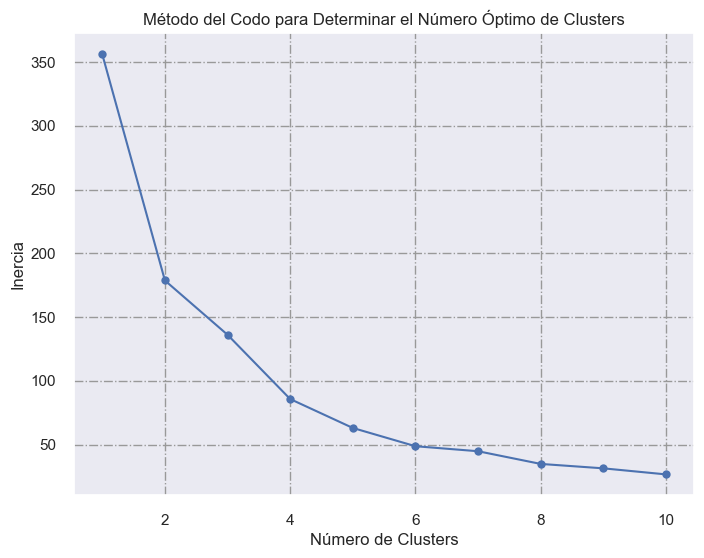

In [73]:
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
range_n_clusters = list(range(1, 11))  # Puedes ajustar el rango si es necesario

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



For n_clusters = 4, el puntaje promedio de la silueta es: 0.46252064253242126


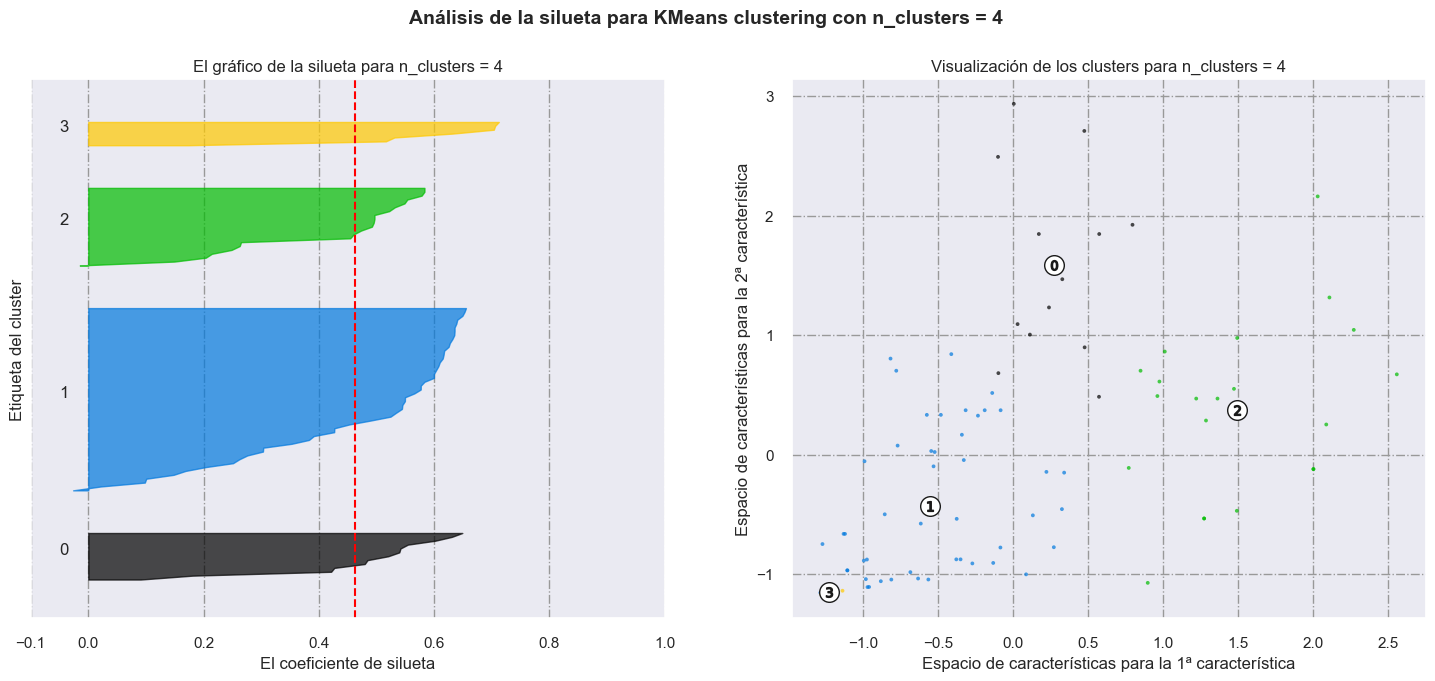

In [74]:
# Establecer el número óptimo de clusters
n_clusters = 4

# Crear el modelo KMeans y ajustar los datos
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Calcular el puntaje promedio de la silueta
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"For n_clusters = {n_clusters}, el puntaje promedio de la silueta es: {silhouette_avg}")

# Calcular las puntuaciones de la silueta para cada muestra
sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Graficar la puntuación de la silueta
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(scaled_features) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title(f"El gráfico de la silueta para n_clusters = {n_clusters}")
ax1.set_xlabel("El coeficiente de silueta")
ax1.set_ylabel("Etiqueta del cluster")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Visualización de los clusters
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    scaled_features[:, 0], scaled_features[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

centers = kmeans.cluster_centers_
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title(f"Visualización de los clusters para n_clusters = {n_clusters}")
ax2.set_xlabel("Espacio de características para la 1ª característica")
ax2.set_ylabel("Espacio de características para la 2ª característica")

plt.suptitle(f"Análisis de la silueta para KMeans clustering con n_clusters = {n_clusters}", fontsize=14, fontweight="bold")

plt.show()

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



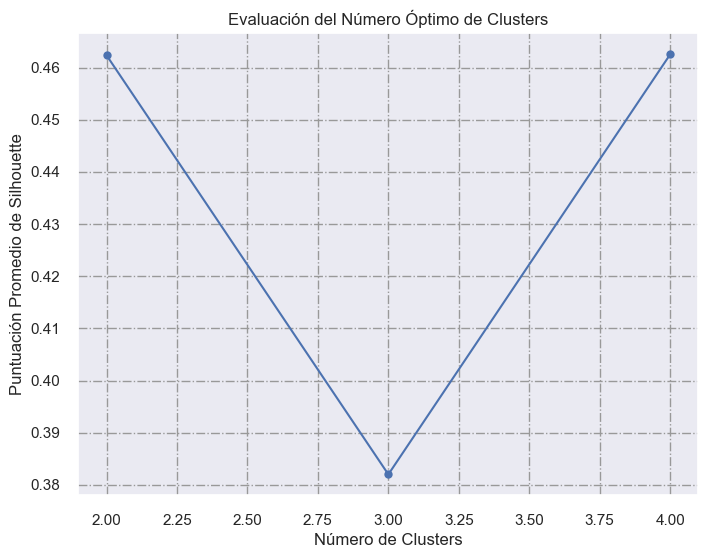

In [75]:
# Determinar el número óptimo de clusters metodo silueta simple
range_n_clusters = list(range(2,5))
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_features)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(scaled_features, cluster_labels))

# Visualizar el gráfico de la métrica de Silhouette
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación Promedio de Silhouette')
plt.title('Evaluación del Número Óptimo de Clusters')
plt.show()

In [76]:
# Elegir el número óptimo basado en la puntuación
optimal_k = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]

# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dfjohn_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)
df_features['Cluster']=  kmeans.fit_predict(scaled_features)


C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\1040372723.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [77]:
dfjohn

FEC_INGRESO                  DISTRITO  \
0    2013-02-05  028-GUAYAQUIL - MARITIMO   
1    2013-03-07                 055-QUITO   
2    2013-05-10  028-GUAYAQUIL - MARITIMO   
3    2013-04-18     019-GUAYAQUIL - AEREO   
4    2013-04-15  028-GUAYAQUIL - MARITIMO   
..          ...                       ...   
113  2013-06-26                 055-QUITO   
114  2013-03-26  028-GUAYAQUIL - MARITIMO   
115  2013-04-03                 055-QUITO   
116  2013-04-02                091-CUENCA   
117  2013-04-01                091-CUENCA   

                                    REGIMEN  \
0                          73-ALMACEN LIBRE   
1                  10-IMPORTACION A CONSUMO   
2                  10-IMPORTACION A CONSUMO   
3                  10-IMPORTACION A CONSUMO   
4                  10-IMPORTACION A CONSUMO   
..                                      ...   
113                10-IMPORTACION A CONSUMO   
114  70-DEPOSITO ADUANERO PUBLICO Y PRIVADO   
115                10-IMPORTACION A CONSUMO   
116                10-IMPORTACION A CONSUMO   
117                10-IMPORTACION A CONSUMO   

                               DESCRIPCION_ARANCELARIA  \
0                                            LOS DEMAS   
1                                            LOS DEMAS   
2                                            LOS DEMAS   
3    TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   
4                                            LOS DEMAS   
..                                                 ...   
113  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
114  TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   
115  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
116  EN RECIPIENTES CON CAPACIDAD INFERIOR O IGUAL ...   
117  TRF ESP ICEXLITRO ALCOHOLPURO6.08USD,PRECIO EX...   

                        PAIS_ORIGEN CONVENIO_INTERNACIONAL TIPO_UNIDAD_FISICA  \
0    GB-REINO UNIDO DE GRAN BRETAÑA              NO APLICA           61-LITRO   
1                           CU-CUBA              NO APLICA           61-LITRO   
2                      GT-GUATEMALA              NO APLICA           61-LITRO   
3                       CO-COLOMBIA              NO APLICA           61-LITRO   
4                      GT-GUATEMALA              NO APLICA           61-LITRO   
..                              ...                    ...                ...   
113                       ES-ESPAÑA              NO APLICA           61-LITRO   
114                       ES-ESPAÑA              NO APLICA           61-LITRO   
115                 NL-PAISES BAJOS              NO APLICA           61-LITRO   
116                       ES-ESPAÑA              NO APLICA           61-LITRO   
117                      FR-FRANCIA              NO APLICA           61-LITRO   

    TIPO_UNIDAD_COMERCIAL  PESO_NETO        FOB  ...  ADVALOREM  \
0                U-UNIDAD     174.54   1401.200  ...      15.51   
1                CAJ-CAJA    2843.51  11025.000  ...     115.90   
2                CAJ-CAJA    1101.52  15346.040  ...     156.88   
3                U-UNIDAD     257.00    319.200  ...       7.12   
4                CAJ-CAJA     430.79   6584.060  ...      67.30   
..                    ...        ...        ...  ...        ...   
113              CAJ-CAJA    1236.00   7178.402  ...      75.78   
114              CAJ-CAJA     630.00  13164.200  ...     136.20   
115          BOT-BOTELLAS    2448.00   5324.730  ...      56.72   
116              CAJ-CAJA    1434.60   6245.640  ...      69.81   
117          BOT-BOTELLAS    1202.14   3689.980  ...      41.79   

     ADVALOREM_ESPECIFICO      LUGAR  FECHA  IMP_ADVALOREM  IMP_RELATIVO  \
0                  1235.0  NO APLICA   None         647.23      0.461911   
1                 15750.0  NO APLICA   None        6417.72      0.582106   
2                 11790.0  NO APLICA   None        6369.20      0.415039   
3                   513.0  NO APLICA   None         172.52      0.540476   
4                  4635.0  NO APLICA   None

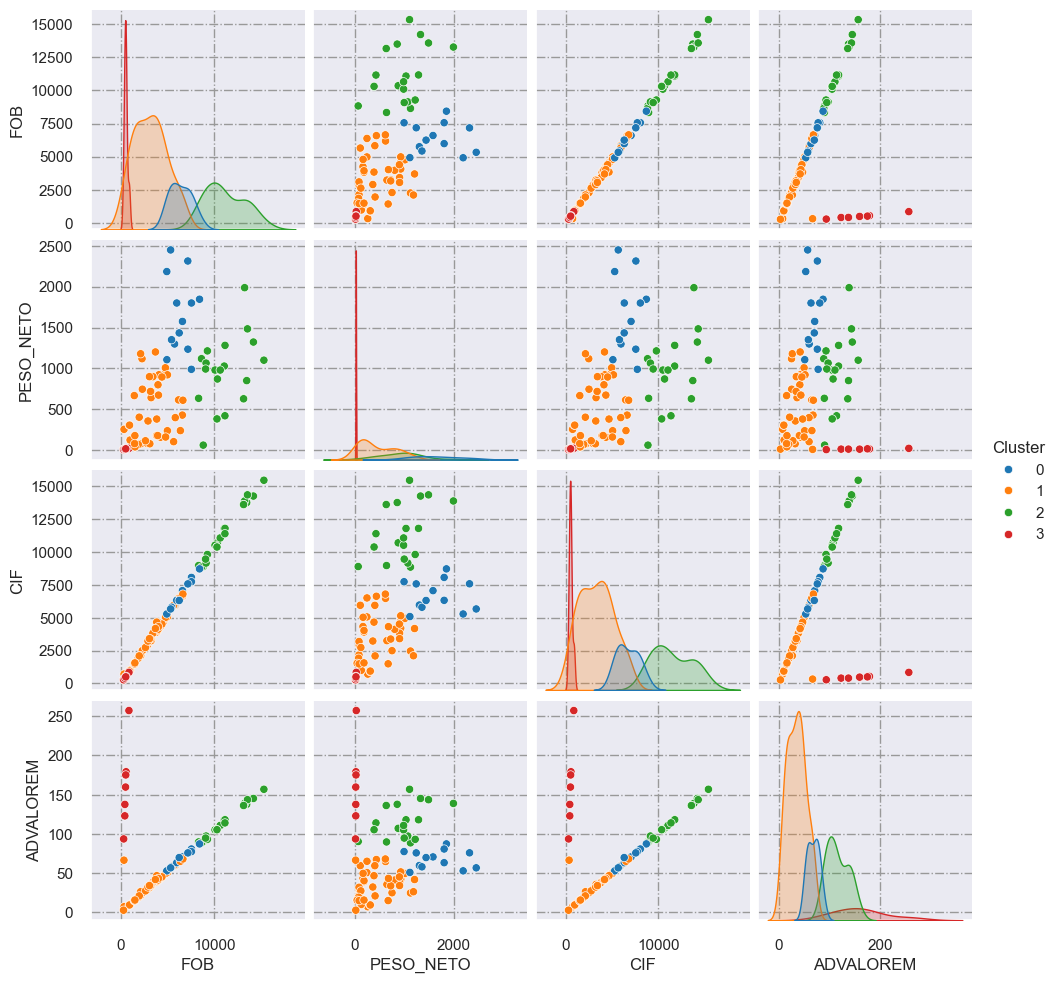

In [78]:
sns.pairplot(data=df_features, hue="Cluster", palette="tab10")

El análisis de clustering ha identificado 4 clusters distintos en base a las características de FOB, Peso Neto, CIF y Advalorem. Estos clusters representan grupos de productos con similitudes en estas variables:

Cluster 0: Productos con FOB bajo, peso neto moderado, CIF bajo y Advalorem bajo. Estos productos podrían representar artículos menos costosos y con menor peso.
Cluster 1: Productos con FOB alto, peso neto alto, CIF alto y Advalorem alto. Estos productos tienden a ser de mayor valor y peso, posiblemente productos especializados o de lujo.
Cluster 2: Productos con FOB bajo pero con peso neto y CIF más altos, lo que podría indicar artículos que, aunque baratos, tienen costos de transporte elevados.
Cluster 3: Productos con características variadas en FOB, peso neto, CIF y Advalorem, posiblemente representando una mezcla de productos con diferentes características y valores.

Modelado Supervisado

¿Cómo puede un modelo de regresión, como el Random Forest Regressor, ser utilizado para predecir el valor FOB de las importaciones, y qué tan confiables son las predicciones para mejorar la gestión de costos y la toma de decisiones en el proceso de importación?

                FOB    PESO_NETO           CIF    ADVALOREM
count    118.000000   118.000000    118.000000   118.000000
mean    5356.304314   754.925814   5567.673381   323.302712
std     4143.686173   923.599389   4260.009077   729.686227
min      264.120000     9.350000    269.960000     2.690000
25%     1672.175000   101.585000   1745.023750    41.332500
50%     4339.945000   404.350000   4599.740000    75.825000
75%     8367.057500  1056.647750   8790.717250   144.790000
max    20250.000000  5000.000000  20317.810000  4423.710000


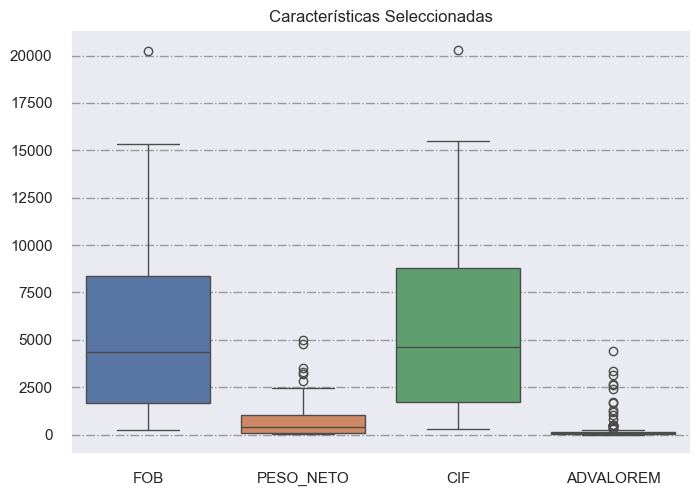

In [79]:
# Visualizar estadísticas descriptivas
print(dfjohn[['FOB', 'PESO_NETO', 'CIF', 'ADVALOREM']].describe())

# Identificar valores atípicos usando boxplots
sns.boxplot(data=dfjohn[['FOB', 'PESO_NETO', 'CIF', 'ADVALOREM']])
plt.title('Características Seleccionadas')
plt.show()

In [80]:
# Seleccionar las características y la variable objetivo
features = dfjohn_cleaned[['FOB', 'PESO_NETO', 'CIF', 'ADVALOREM']]
target = dfjohn_cleaned['FOB']  # Ejemplo de variable objetivo

# Escalar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [81]:
# Crear y entrenar el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [82]:
# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Regressor MSE: {mse}')


Random Forest Regressor MSE: 9462.614804397806


In [83]:
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

R^2: 0.998904934817622


En la gestión de importaciones, preveer el valor FOB (Free on Board) de los productos es esencial para controlar los costos y optimizar la planificación financiera. Un modelo de regresión puede predecir este valor de manera precisa, permitiendo a la empresa tomar decisiones más informadas y gestionar mejor su presupuesto de importación.

El modelo de Random Forest Regressor demuestra un ajuste excepcionalmente bueno a los datos, con un R² cercano a 1. Sin embargo, el MSE relativamente alto sugiere que hay margen para mejorar la precisión del modelo. Esta alta capacidad predictiva puede ser utilizada para afinar las estimaciones de costos en las importaciones, ayudando a las empresas a gestionar mejor sus presupuestos y tomar decisiones más informadas sobre sus operaciones de importación.

# AVANCE 2 Eduart Macias
## ¿Cómo se distribuyen las importaciones en Ecuador según el país de origen y las regiones geográficas, y  hay regiones con patrones similares de importaciones?

In [84]:
dfmacias = df
gdfmacias = gdf

In [85]:
dfmacias['REGION'] = dfmacias['DISTRITO_UBICACION'].apply(lambda x: x.upper())
gdfmacias['REGION'] = gdfmacias['DPA_DESCAN'].apply(lambda x: x.upper())

In [86]:
merged_data = gdfmacias.merge(dfmacias, on="REGION")

In [87]:
merged_data

DPA_VALOR DPA_ANIO DPA_CANTON DPA_DESCAN DPA_PROVIN DPA_DESPRO  PCODE2  \
0           0     2011       0101     CUENCA         01      AZUAY  EC0101   
1           0     2011       0101     CUENCA         01      AZUAY  EC0101   
2           0     2011       0101     CUENCA         01      AZUAY  EC0101   
3           0     2011       0101     CUENCA         01      AZUAY  EC0101   
4           0     2011       0101     CUENCA         01      AZUAY  EC0101   
5           0     2011       0101     CUENCA         01      AZUAY  EC0101   
6           0     2011       0101     CUENCA         01      AZUAY  EC0101   
7           0     2011       0101     CUENCA         01      AZUAY  EC0101   
8           0     2011       0101     CUENCA         01      AZUAY  EC0101   
9           0     2011       0101     CUENCA         01      AZUAY  EC0101   
10          0     2011       0101     CUENCA         01      AZUAY  EC0101   
11          0     2011       0101     CUENCA         01      AZUAY  EC0101   
12          0     2011       0101     CUENCA         01      AZUAY  EC0101   
13          0     2011       0101     CUENCA         01      AZUAY  EC0101   
14          0     2011       0101     CUENCA         01      AZUAY  EC0101   
15          0     2011       0101     CUENCA         01      AZUAY  EC0101   
16          0     2011       0101     CUENCA         01      AZUAY  EC0101   
17          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
18          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
19          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
20          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
21          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
22          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
23          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
24          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
25          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
26          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
27          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
28          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
29          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
30          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
31          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
32          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
33          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
34          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
35          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
36          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
37          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
38          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
39          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
40          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
41          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
42          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
43          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
44          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
45          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
46          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
47          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
48          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
49          0     2011       1701      QUITO         17  PICHINCHA  EC1701   
50          0     2011    

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3792\1944756718.py:6: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




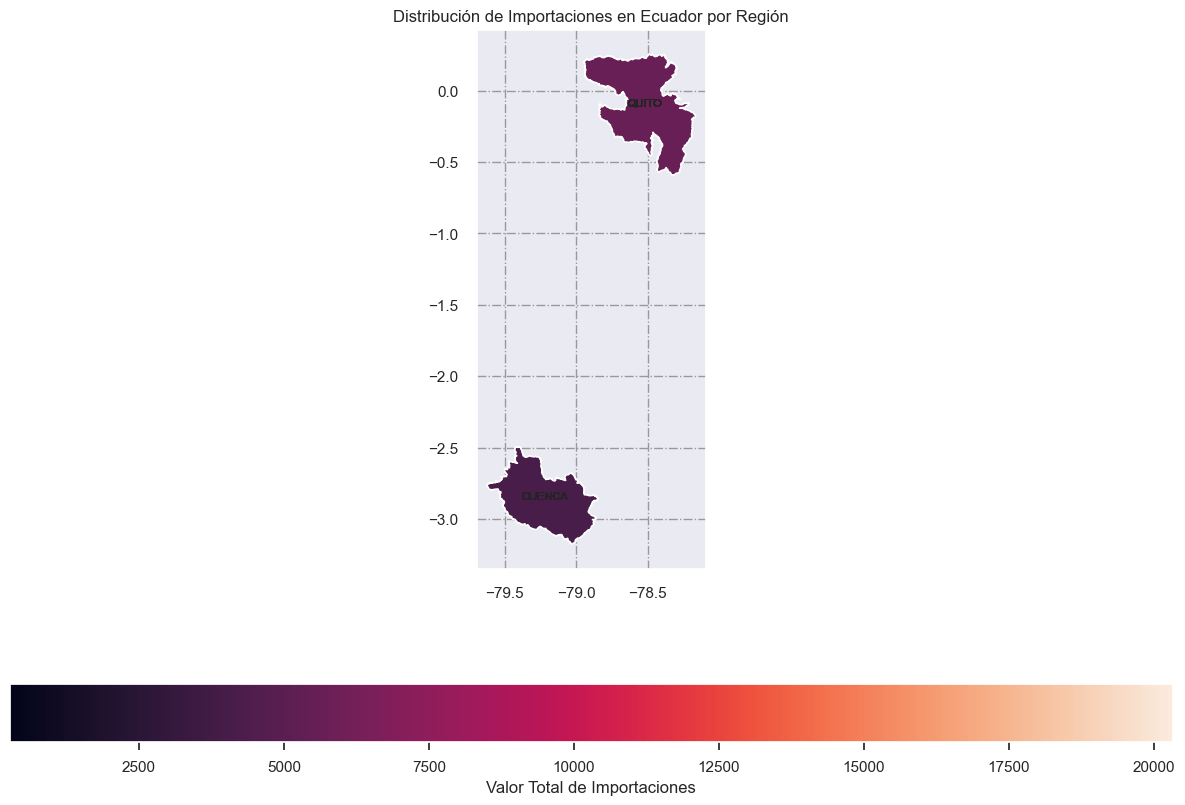

In [88]:
# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='CIF', ax=ax, legend=True,
                 legend_kwds={'label': "Valor Total de Importaciones",
                              'orientation': "horizontal"})
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['REGION']):
    ax.text(x, y, label, fontsize=8, ha='center')
plt.title("Distribución de Importaciones en Ecuador por Región")
plt.show()

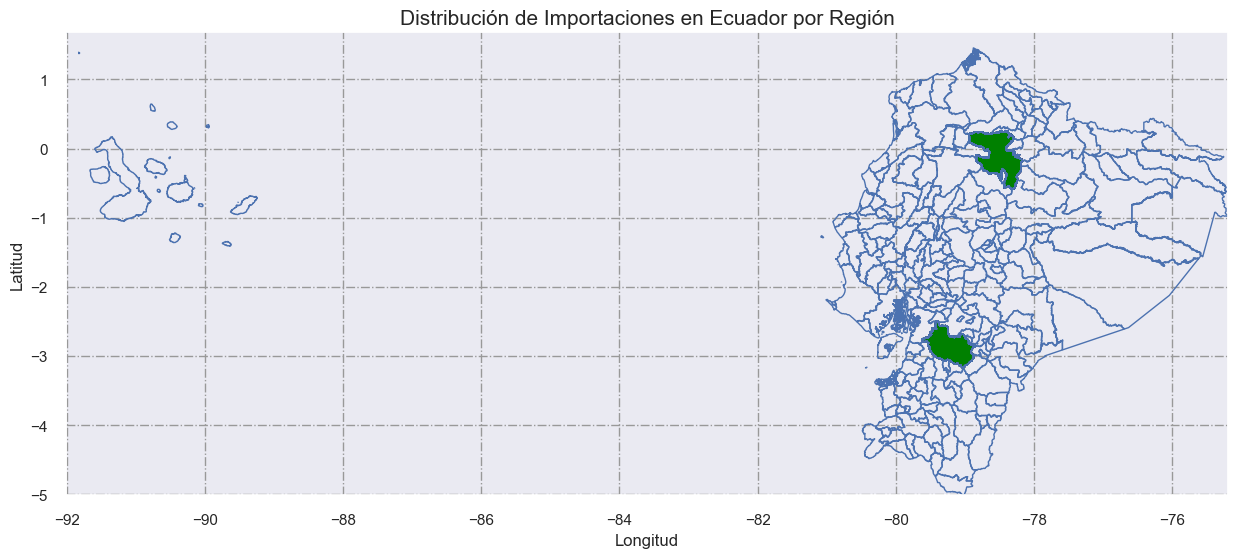

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(ax=ax, color='green', edgecolor='black', alpha=0.7)
ax.set_title('Distribución de Importaciones en Ecuador por Región', fontsize=15)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)
ax.set_xlim(world.total_bounds[[0, 2]])
ax.set_ylim(world.total_bounds[[1, 3]])
plt.show()

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak o

          CIF                                                              \
        count          mean          std       min         25%        50%   
CLUSTER                                                                     
0        18.0   1306.746833   907.930633   279.336   510.91625  1253.8195   
1        20.0   4623.373350  1386.093561  2108.840  3590.27775  4523.3895   
2        20.0  10082.589600  4119.552727  5037.810  6325.78250  9715.6050   

                               CANTIDAD_FISICA                           \
                75%        max           count         mean         std   
CLUSTER                                                                   
0         1703.4975   3793.558            18.0   103.572778   92.852721   
1         5351.4200   7170.859            20.0   604.800000  245.577804   
2        13393.6250  20317.810            20.0  1297.882500  572.479086   

                                                    
            min       25%     50%

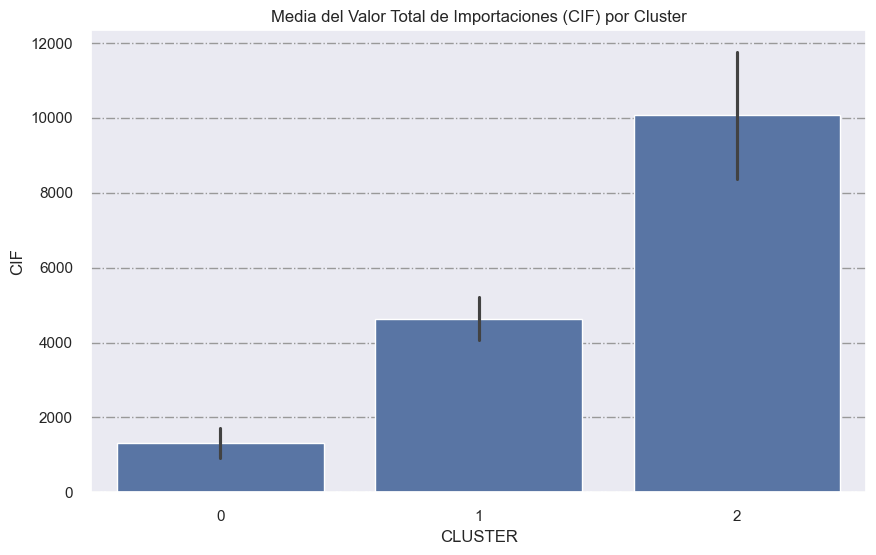

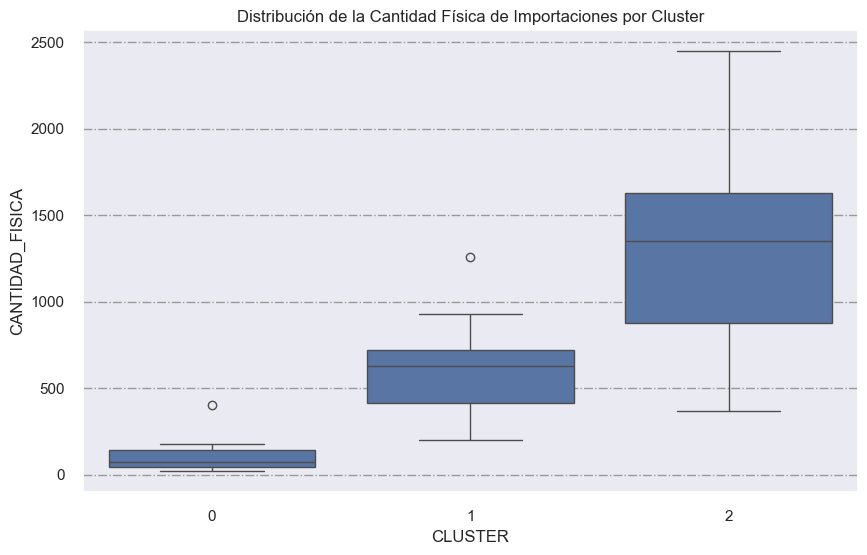

In [90]:
# Selección de características relevantes para el clustering
features = ['CIF', 'CANTIDAD_FISICA']  
Xm = merged_data[features].fillna(0)  # Asegurarse de no tener valores nulos

# Normalizar los datos
scaler = StandardScaler()
X_scaledm = scaler.fit_transform(Xm)

# Aplicar K-Means
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaledm)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaledm, labels))

best_k = K[np.argmax(silhouette_scores)]
kmeansm = KMeans(n_clusters=best_k, random_state=42)  # Ajusta el número de clusters si es necesario
clustersm = kmeansm.fit_predict(X_scaledm)

# Añadir los clusters al dataframe
merged_data['CLUSTER'] = clustersm

cluster_summary = merged_data.groupby('CLUSTER')[['CIF', 'CANTIDAD_FISICA']].describe()
print(cluster_summary)

# Gráfico de barras para comparar la media de 'CIF' por cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='CLUSTER', y='CIF', data=merged_data, estimator=np.mean)
plt.title('Media del Valor Total de Importaciones (CIF) por Cluster')
plt.show()

# Boxplot para ver la distribución de 'CANTIDAD_FISICA' en cada cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='CLUSTER', y='CANTIDAD_FISICA', data=merged_data)
plt.title('Distribución de la Cantidad Física de Importaciones por Cluster')
plt.show()

Cluster 0:
CIF Medio: 1306.75
Cantidad Física Media: 103.57
Este cluster parece representar regiones que manejan un volumen bajo de importaciones con valores de importación relativamente bajos. La desviación estándar de CANTIDAD_FISICA es moderada, lo que sugiere que las regiones en este grupo tienen una distribución más consistente en el volumen importado.
Conclusion: Regiones con bajo valor y volumen de importaciones. Estas podrían ser áreas menos activas económicamente en términos de importaciones.

Cluster 1:
CIF Medio: 4623.37
Cantidad Física Media: 604.80
Este grupo maneja importaciones de mayor volumen y valor en comparación con el Cluster 0. Las regiones en este cluster importan productos más costosos o en mayores cantidades, lo cual se refleja en las cifras más altas. La desviación estándar de CANTIDAD_FISICA es mayor que en el Cluster 0, lo que indica una mayor variabilidad en los volúmenes de importación entre las regiones de este grupo.
Conclusion: Regiones con importaciones de valores y volúmenes moderados. Este grupo puede representar áreas con una actividad comercial media.

Cluster 2:
CIF Medio: 10082.59
Cantidad Física Media: 1297.88
Este cluster tiene tanto el valor de importaciones más alto como el volumen físico de importaciones más alto. Las regiones en este grupo están muy activas en términos de comercio de importación y manejan productos de alto valor y en grandes volúmenes. La desviación estándar también es alta, lo que sugiere una gran variabilidad entre las regiones en cuanto a la cantidad física de importaciones.
Conclusion: Regiones altamente activas en términos de importaciones, manejando tanto altos volúmenes como productos de alto valor. Estas podrían ser las principales áreas comerciales o logísticas del país.

El gráfico de barras muestra que el Cluster 2 tiene, en promedio, el valor total de importaciones más alto (CIF), seguido por el Cluster 1 y luego el Cluster 0. Esto visualmente refuerza la idea de que los grupos están diferenciados principalmente por el valor de las importaciones.

El boxplot de la CANTIDAD_FISICA revela cómo la dispersión de los datos varía en cada cluster. El Cluster 2 tiene una dispersión mayor, lo que indica que hay regiones con importaciones muy altas en cuanto a volumen, pero también una variabilidad significativa entre ellas.

In [91]:
# Seleccionar las características y la variable objetivo
Xma = merged_data[['FOB', 'FLETE', 'SEGURO', 'PESO_NETO', 'CANTIDAD_FISICA', 'CANTIDAD_COMERCIAL', 'IVA', 'CLUSTER']]
ym = merged_data['CIF']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xma, ym, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_trainm, y_trainm)

# Hacer predicciones
y_predm= model.predict(X_testm)

# Evaluar el modelo
msem = mean_squared_error(y_testm, y_predm)
r2m = r2_score(y_testm, y_predm)
print(f"Error cuadrático medio: {msem}")
print(f"R2 score: {r2m}")

Error cuadrático medio: 4.976187882070851e-24
R2 score: 1.0


Interpretación:
Error Cuadrático Medio (MSE): Un valor extremadamente bajo (casi cero) sugiere que las predicciones están muy cercanas a los valores reales. Esto, en principio, parecería ideal. Sin embargo, puede ser un indicio de un problema de sobreajuste, especialmente si los datos de prueba son demasiado similares a los datos de entrenamiento.

R² Score: Un valor de 1.0 indica que el modelo explica el 100% de la variabilidad en los datos de prueba. Esto también parece ser un resultado ideal, pero, combinado con el MSE extremadamente bajo, podría sugerir que el modelo está sobreajustado. Es posible que el modelo esté memorizando los datos en lugar de generalizar bien.